# Hands-on clustering 1: Multi-spectral image segmentation: MARS

In [65]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [20, 20]

# 1 Data

# 2 Objectives

# 3 Data exploration

## 3.1 Read the data and understand the formatting

### 3.1.1. Read the `mars.csv` data using the read csv method of the pandas library.

In [2]:
mars = pd.read_csv("./Data/mars.csv")

- 300 x 128 pixels
- Pour chaque pixels on associe un vecteur de dim 255 (255 bandes)

In [3]:
print(mars.shape)
print(mars["V1"].shape)
print(mars["V1"][1])

(38400, 255)
(38400,)
0.16364774


### 3.1.2. Display a summary of the data using the describe method.

In [55]:
mars

V1        V2        V3        V4        V5        V6        V7  \
0      0.244973  0.350886  0.348441  0.363784  0.358491  0.363753  0.374347   
1      0.163648  0.307574  0.344063  0.360967  0.359314  0.364588  0.372576   
2      0.246103  0.297238  0.355239  0.358141  0.362652  0.365431  0.365535   
3      0.287628  0.308790  0.340226  0.366061  0.355713  0.356833  0.366133   
4      0.247076  0.320599  0.341013  0.352210  0.356535  0.355356  0.364336   
...         ...       ...       ...       ...       ...       ...       ...   
38395  0.193134  0.274303  0.280883  0.282799  0.281096  0.282927  0.286683   
38396  0.193383  0.289575  0.274234  0.283163  0.284851  0.284846  0.292401   
38397  0.193667  0.282529  0.267620  0.278625  0.285269  0.282153  0.285690   
38398  0.193917  0.267937  0.271478  0.276505  0.278835  0.280958  0.282487   
38399  0.249756  0.275822  0.282439  0.281882  0.280951  0.284495  0.286483   

             V8        V9       V10  ...      V246      V247      V248  \
0      0.363450  0.365693  0.359439  ...  0.382391  0.451095  0.444223   
1      0.368330  0.366532  0.363055  ...  0.426349  0.422770  0.460147   
2      0.377298  0.360611  0.361098  ...  0.412942  0.453176  0.446272   
3      0.357601  0.357813  0.360288  ...  0.370367  0.409704  0.461966   
4      0.370642  0.358640  0.355510  ...  0.385674  0.440195  0.478032   
...         ...       ...       ...  ...       ...       ...       ...   
38395  0.289296  0.280190  0.281546  ...  0.377218  0.363897  0.374951   
38396  0.289668  0.279404  0.284753  ...  0.358318  0.374275  0.365374   
38397  0.295585  0.280963  0.276631  ...  0.368551  0.384748  0.345760   
38398  0.284973  0.275583  0.278888  ...  0.369028  0.375309  0.315942   
38399  0.288147  0.277141  0.281203  ...  0.359840  0.385816  0.387132   

           V249      V250      V251      V252      V253      V254      V255  
0      0.384423  0.444853  0.463225  0.428826  0.470096  0.428914  0.463361  
1      0.415957  0.461742  0.464288  0.395610  0.382859  0.485595  0.483626  
2      0.447642  0.431001  0.481777  0.396525  0.419152  0.468110  0.484745  
3      0.371442  0.479499  0.466124  0.414342  0.437571  0.524793  0.466260  
4      0.403145  0.416736  0.483681  0.449715  0.403035  0.488642  0.448016  
...         ...       ...       ...       ...       ...       ...       ...  
38395  0.379854  0.367617  0.410975  0.380546  0.405206  0.457212  0.437508  
38396  0.359654  0.357379  0.378343  0.392579  0.393805  0.382610  0.451033  
38397  0.401622  0.390084  0.389968  0.404715  0.418264  0.420823  0.451696  
38398  0.381394  0.412070  0.401557  0.382089  0.394893  0.433933  0.413288  
38399  0.392348  0.401923  0.424353  0.359472  0.431398  0.409405  0.439932  

[38400 rows x 255 columns]

### 3.1.3. How many rows and columns do the data have? What does it mean in terms of number of data points? Dimensionality of the data?

In [5]:
print(mars.shape)

(38400, 255)


- 255 Columns for each features (spectral value)
- 38400 Rows for each individual (pixels)

La dimensions de nos données est donc de $38400 \times 255 = 9792000$.

Pour chaque pixels (/individus) parmis les 38400 on associe un vecteur de dimensions $255$.

## 3.2 Data preprocessing

### 3.2.1. Draw the histograms of six different dimensions (wave length) selected at random. They represent the distributions of the values of a given dimension across the different pixels.

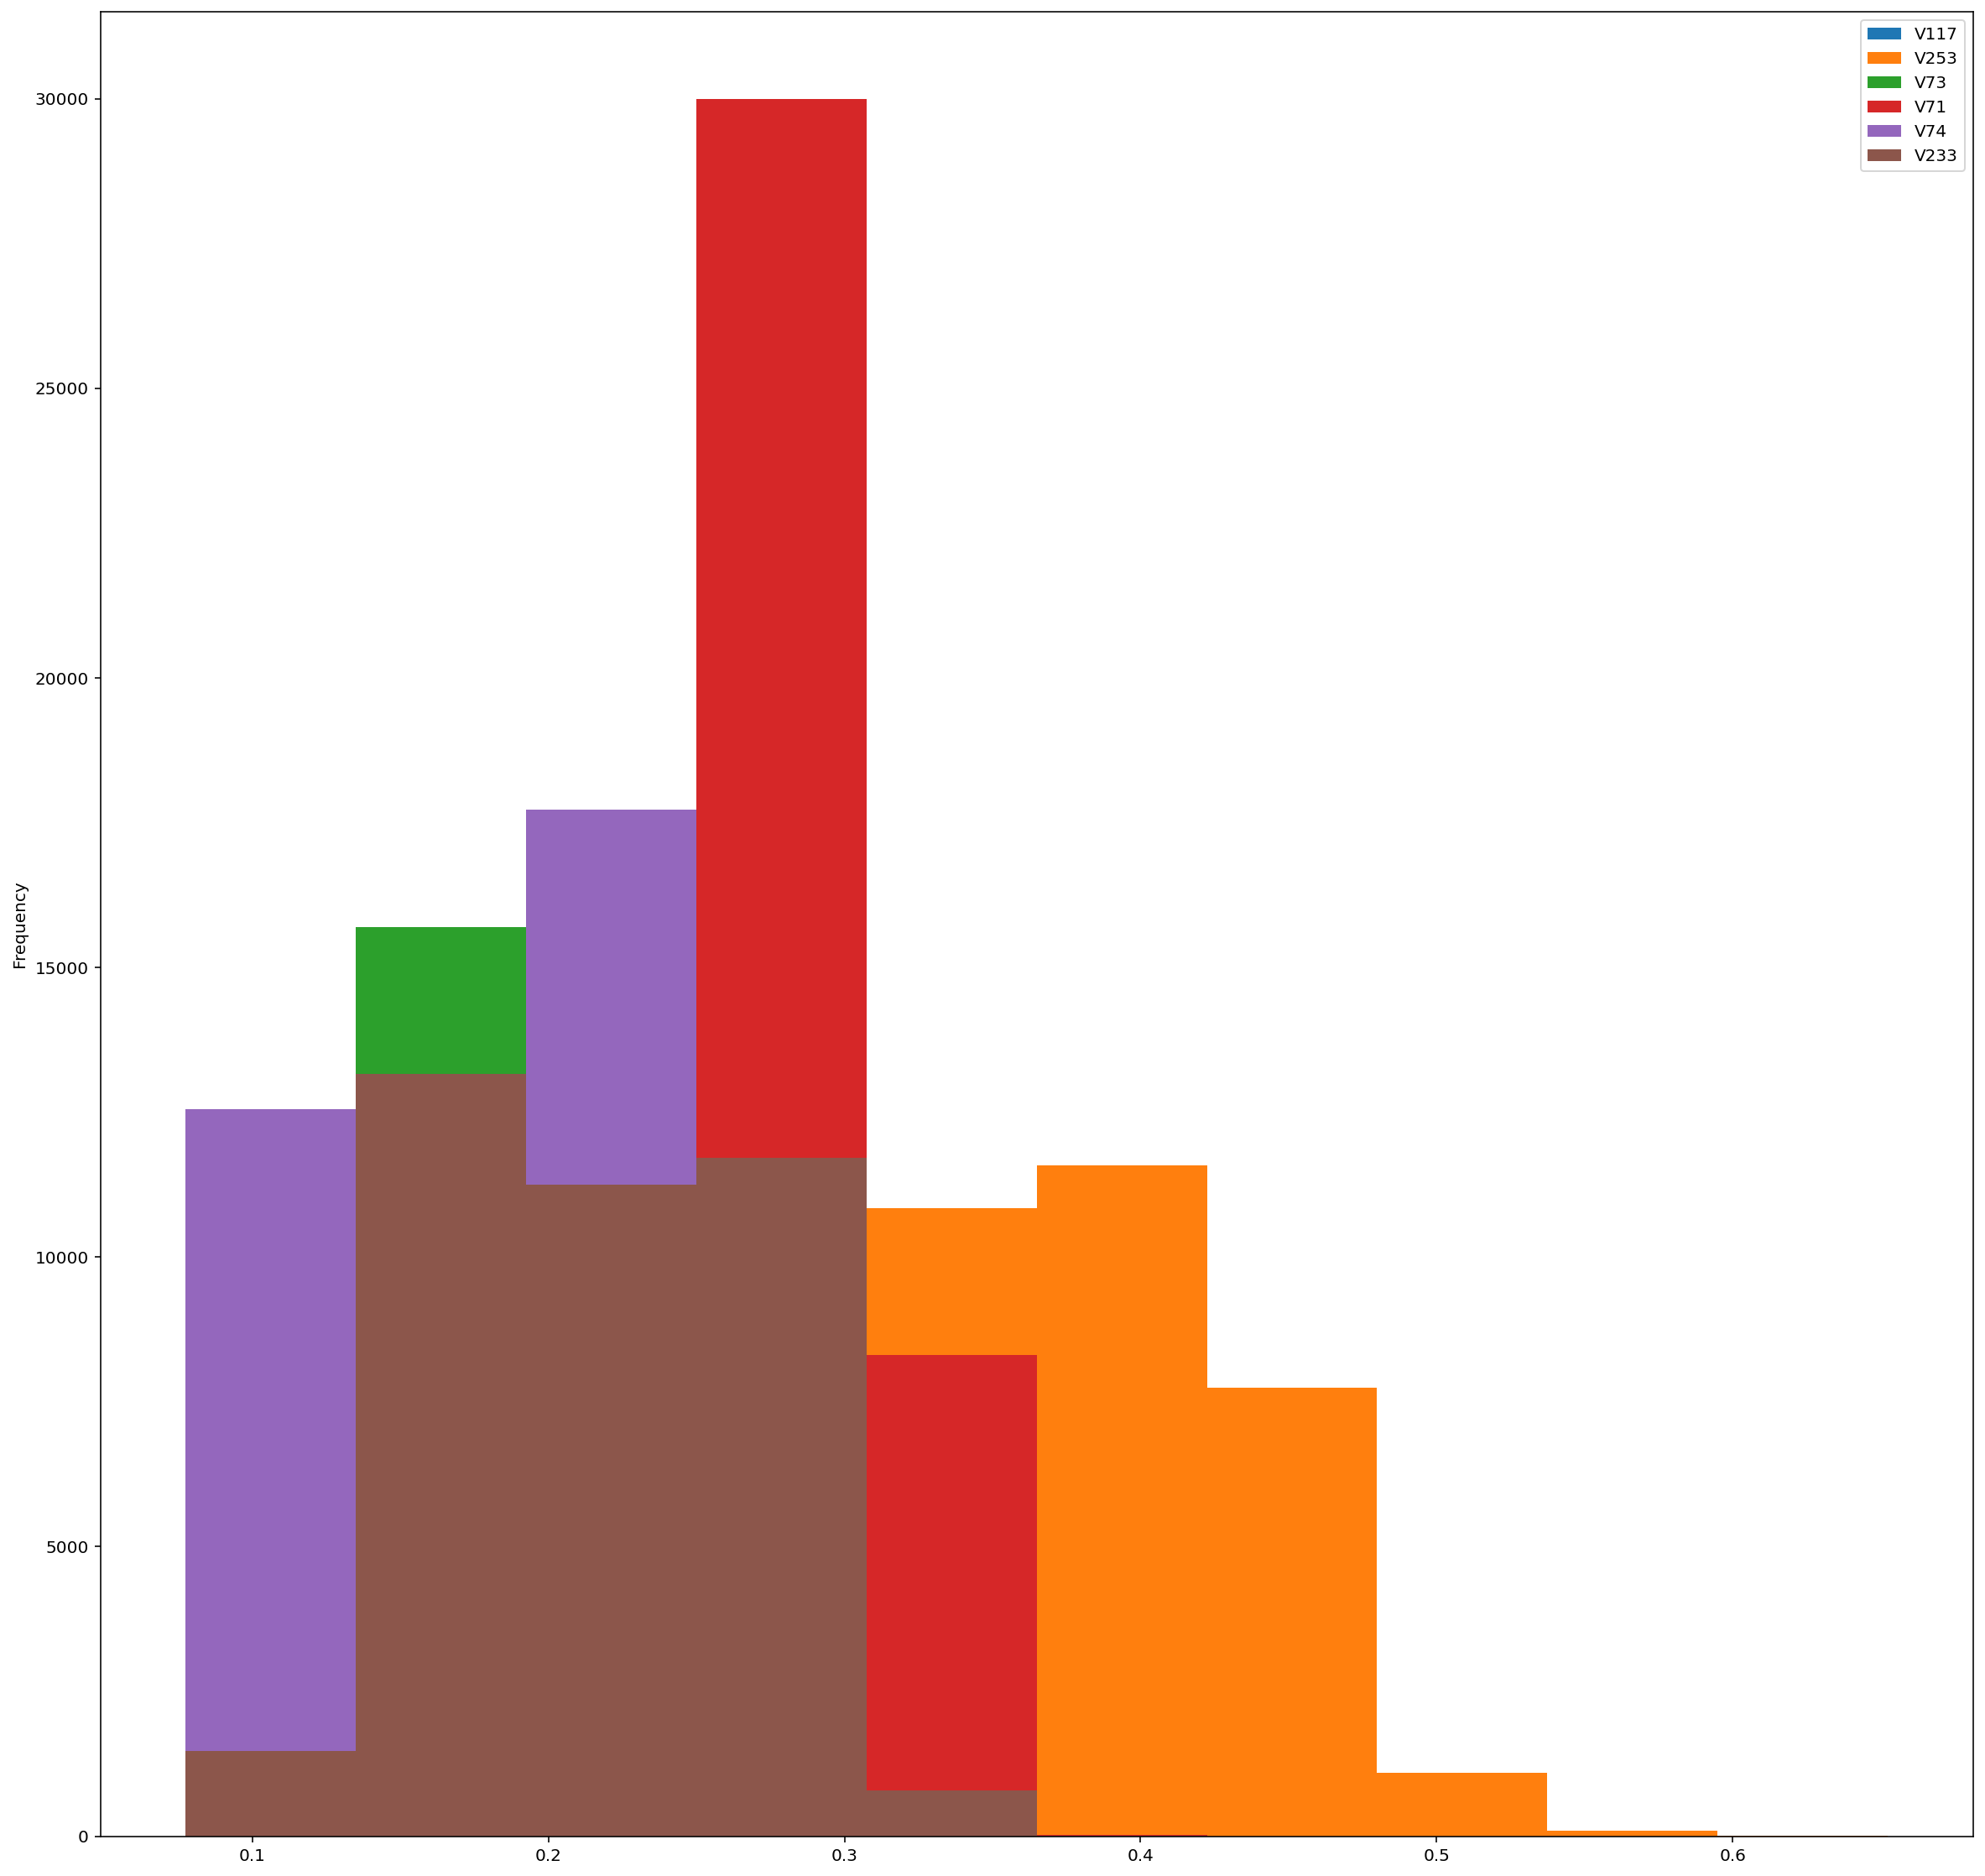

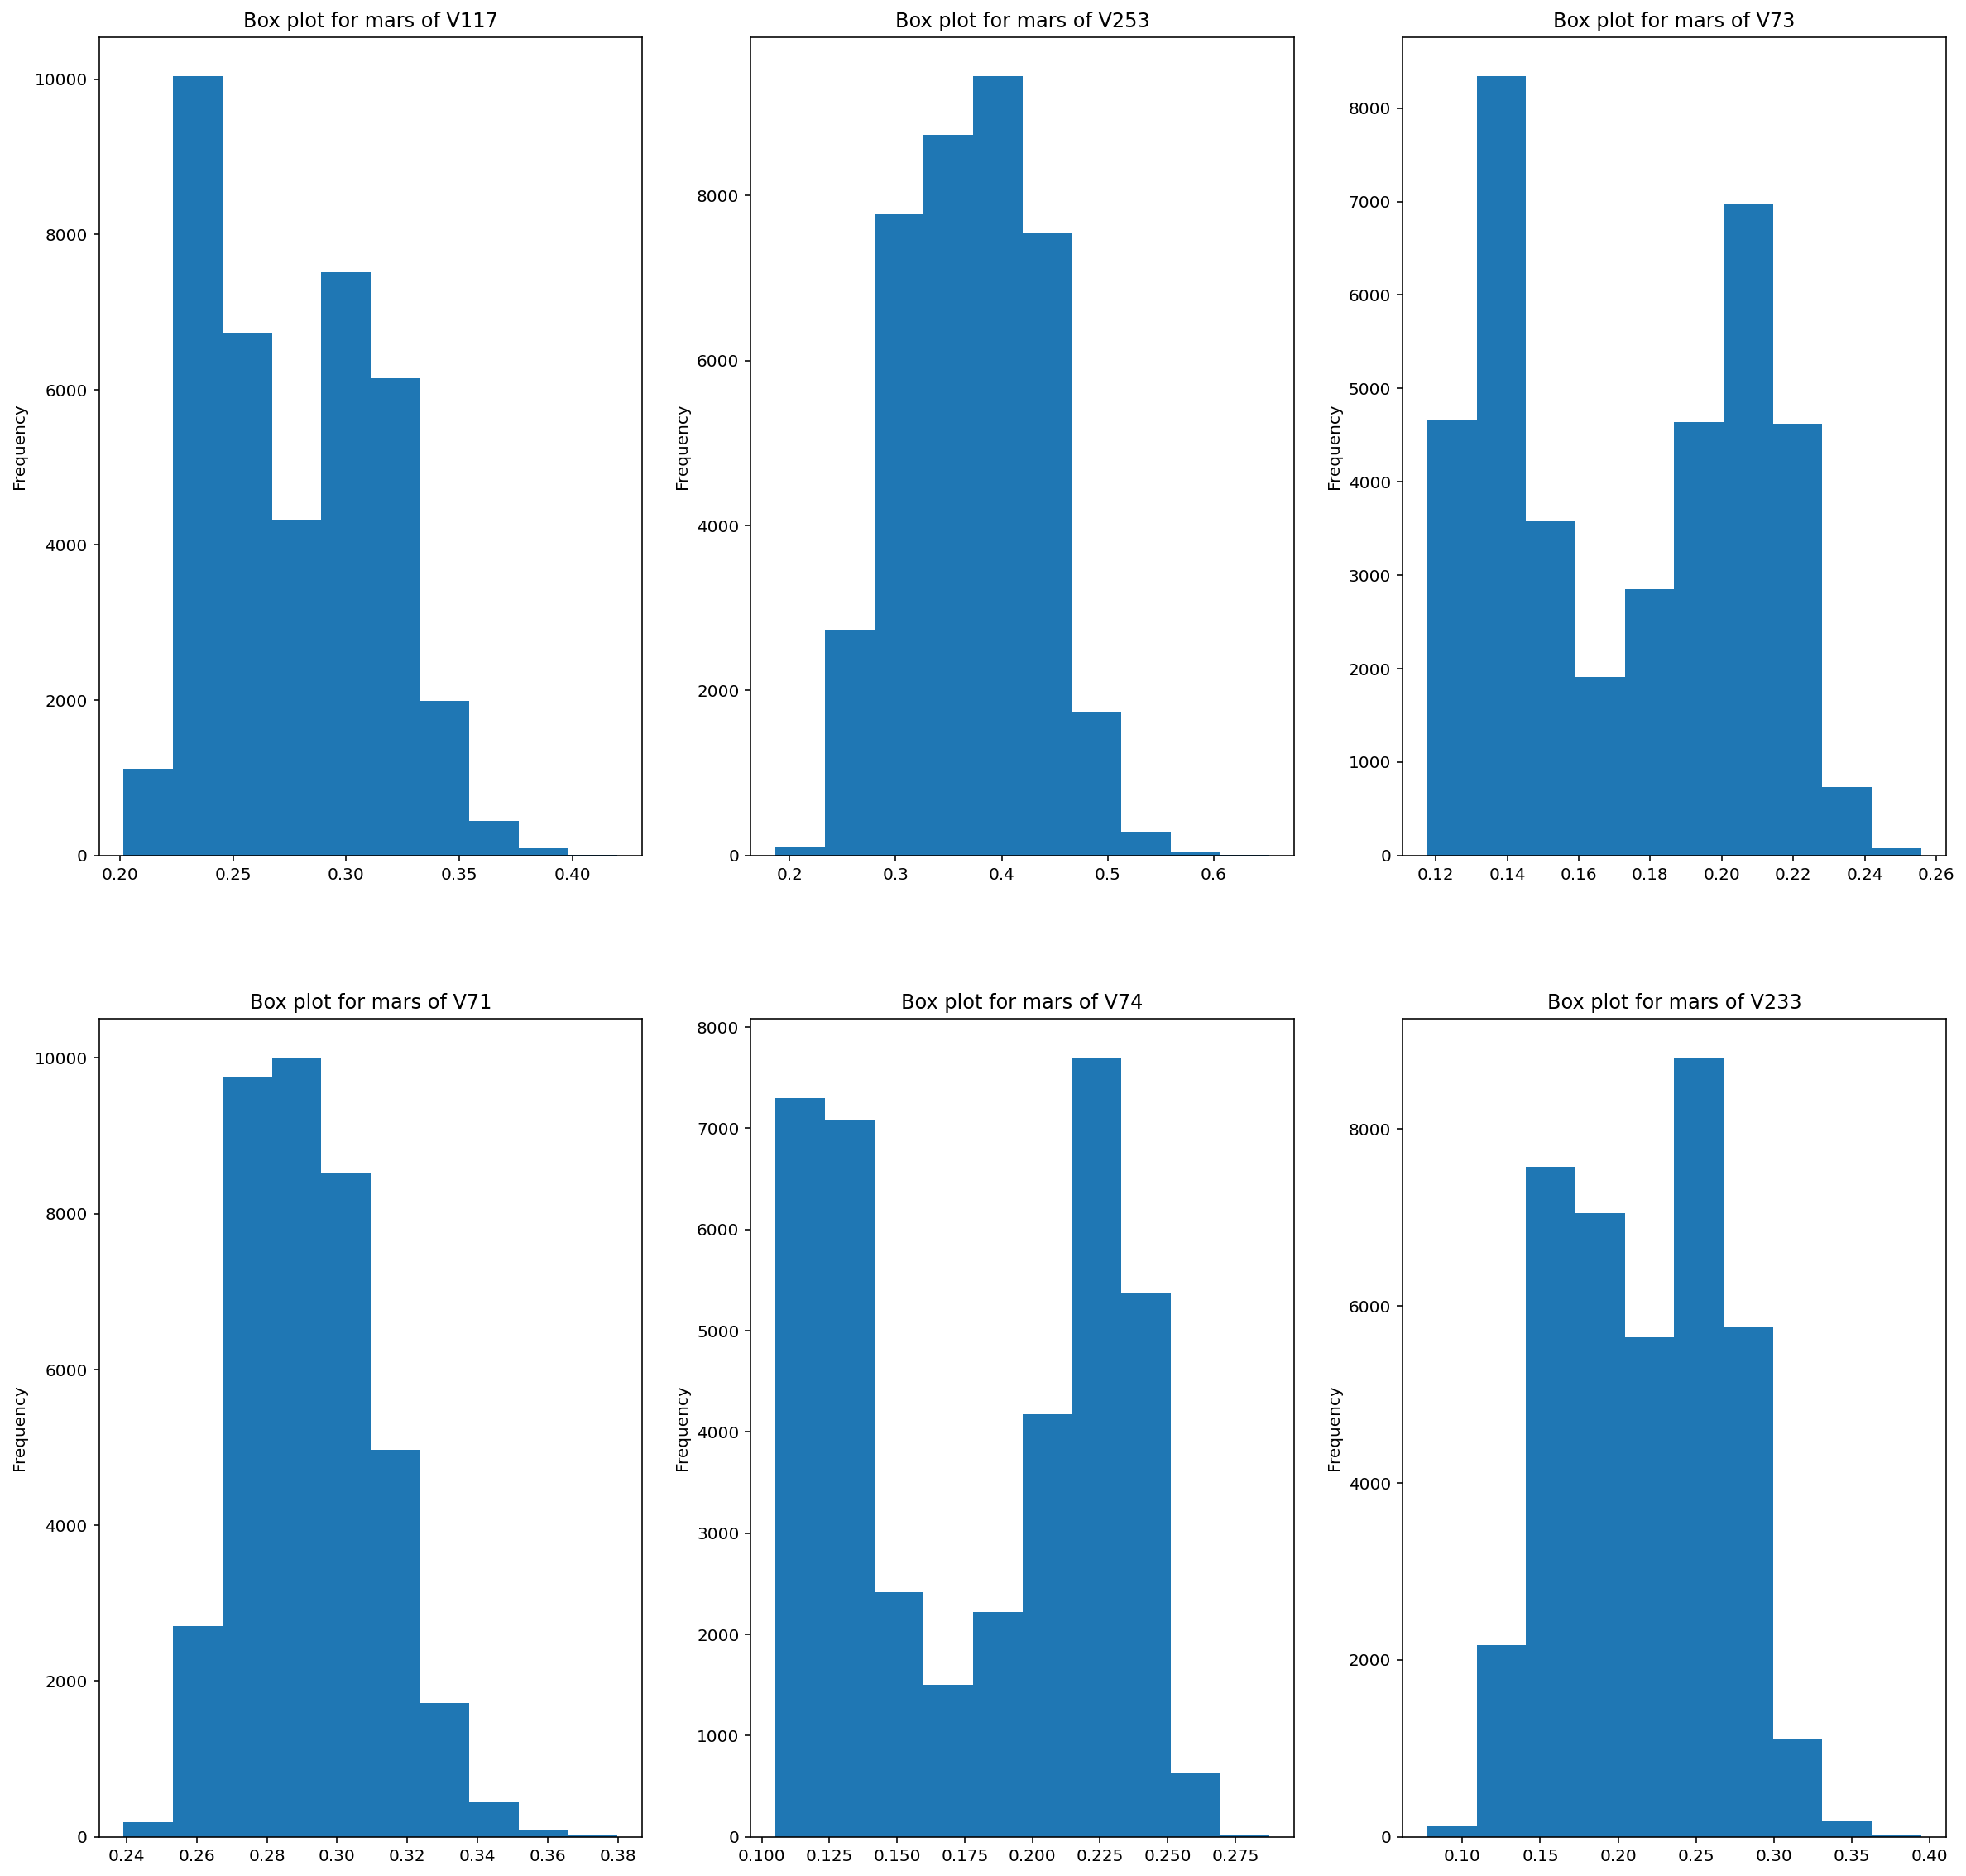

In [6]:
choice = np.random.choice(mars.columns, size=6)
mars[choice].plot.hist()
plt.show()

for i, dim in enumerate(choice):
    plt.subplot(2, 3, i+1)
    mars[dim].plot.hist()
    plt.title(f"Box plot for mars of {dim}")

plt.show()


#### (a) What can you say regarding the discriminative power of single dimensions?

As all distribution for each V are not the same it whould be possible to discriminate features but not essentially with only one dimension.

#### (b) The symmetry of the data?

There are no symmetry in the data

### 3.2.2. Draw the box plots of all different wave lengths. They should all appear on the same graph.

<AxesSubplot:>

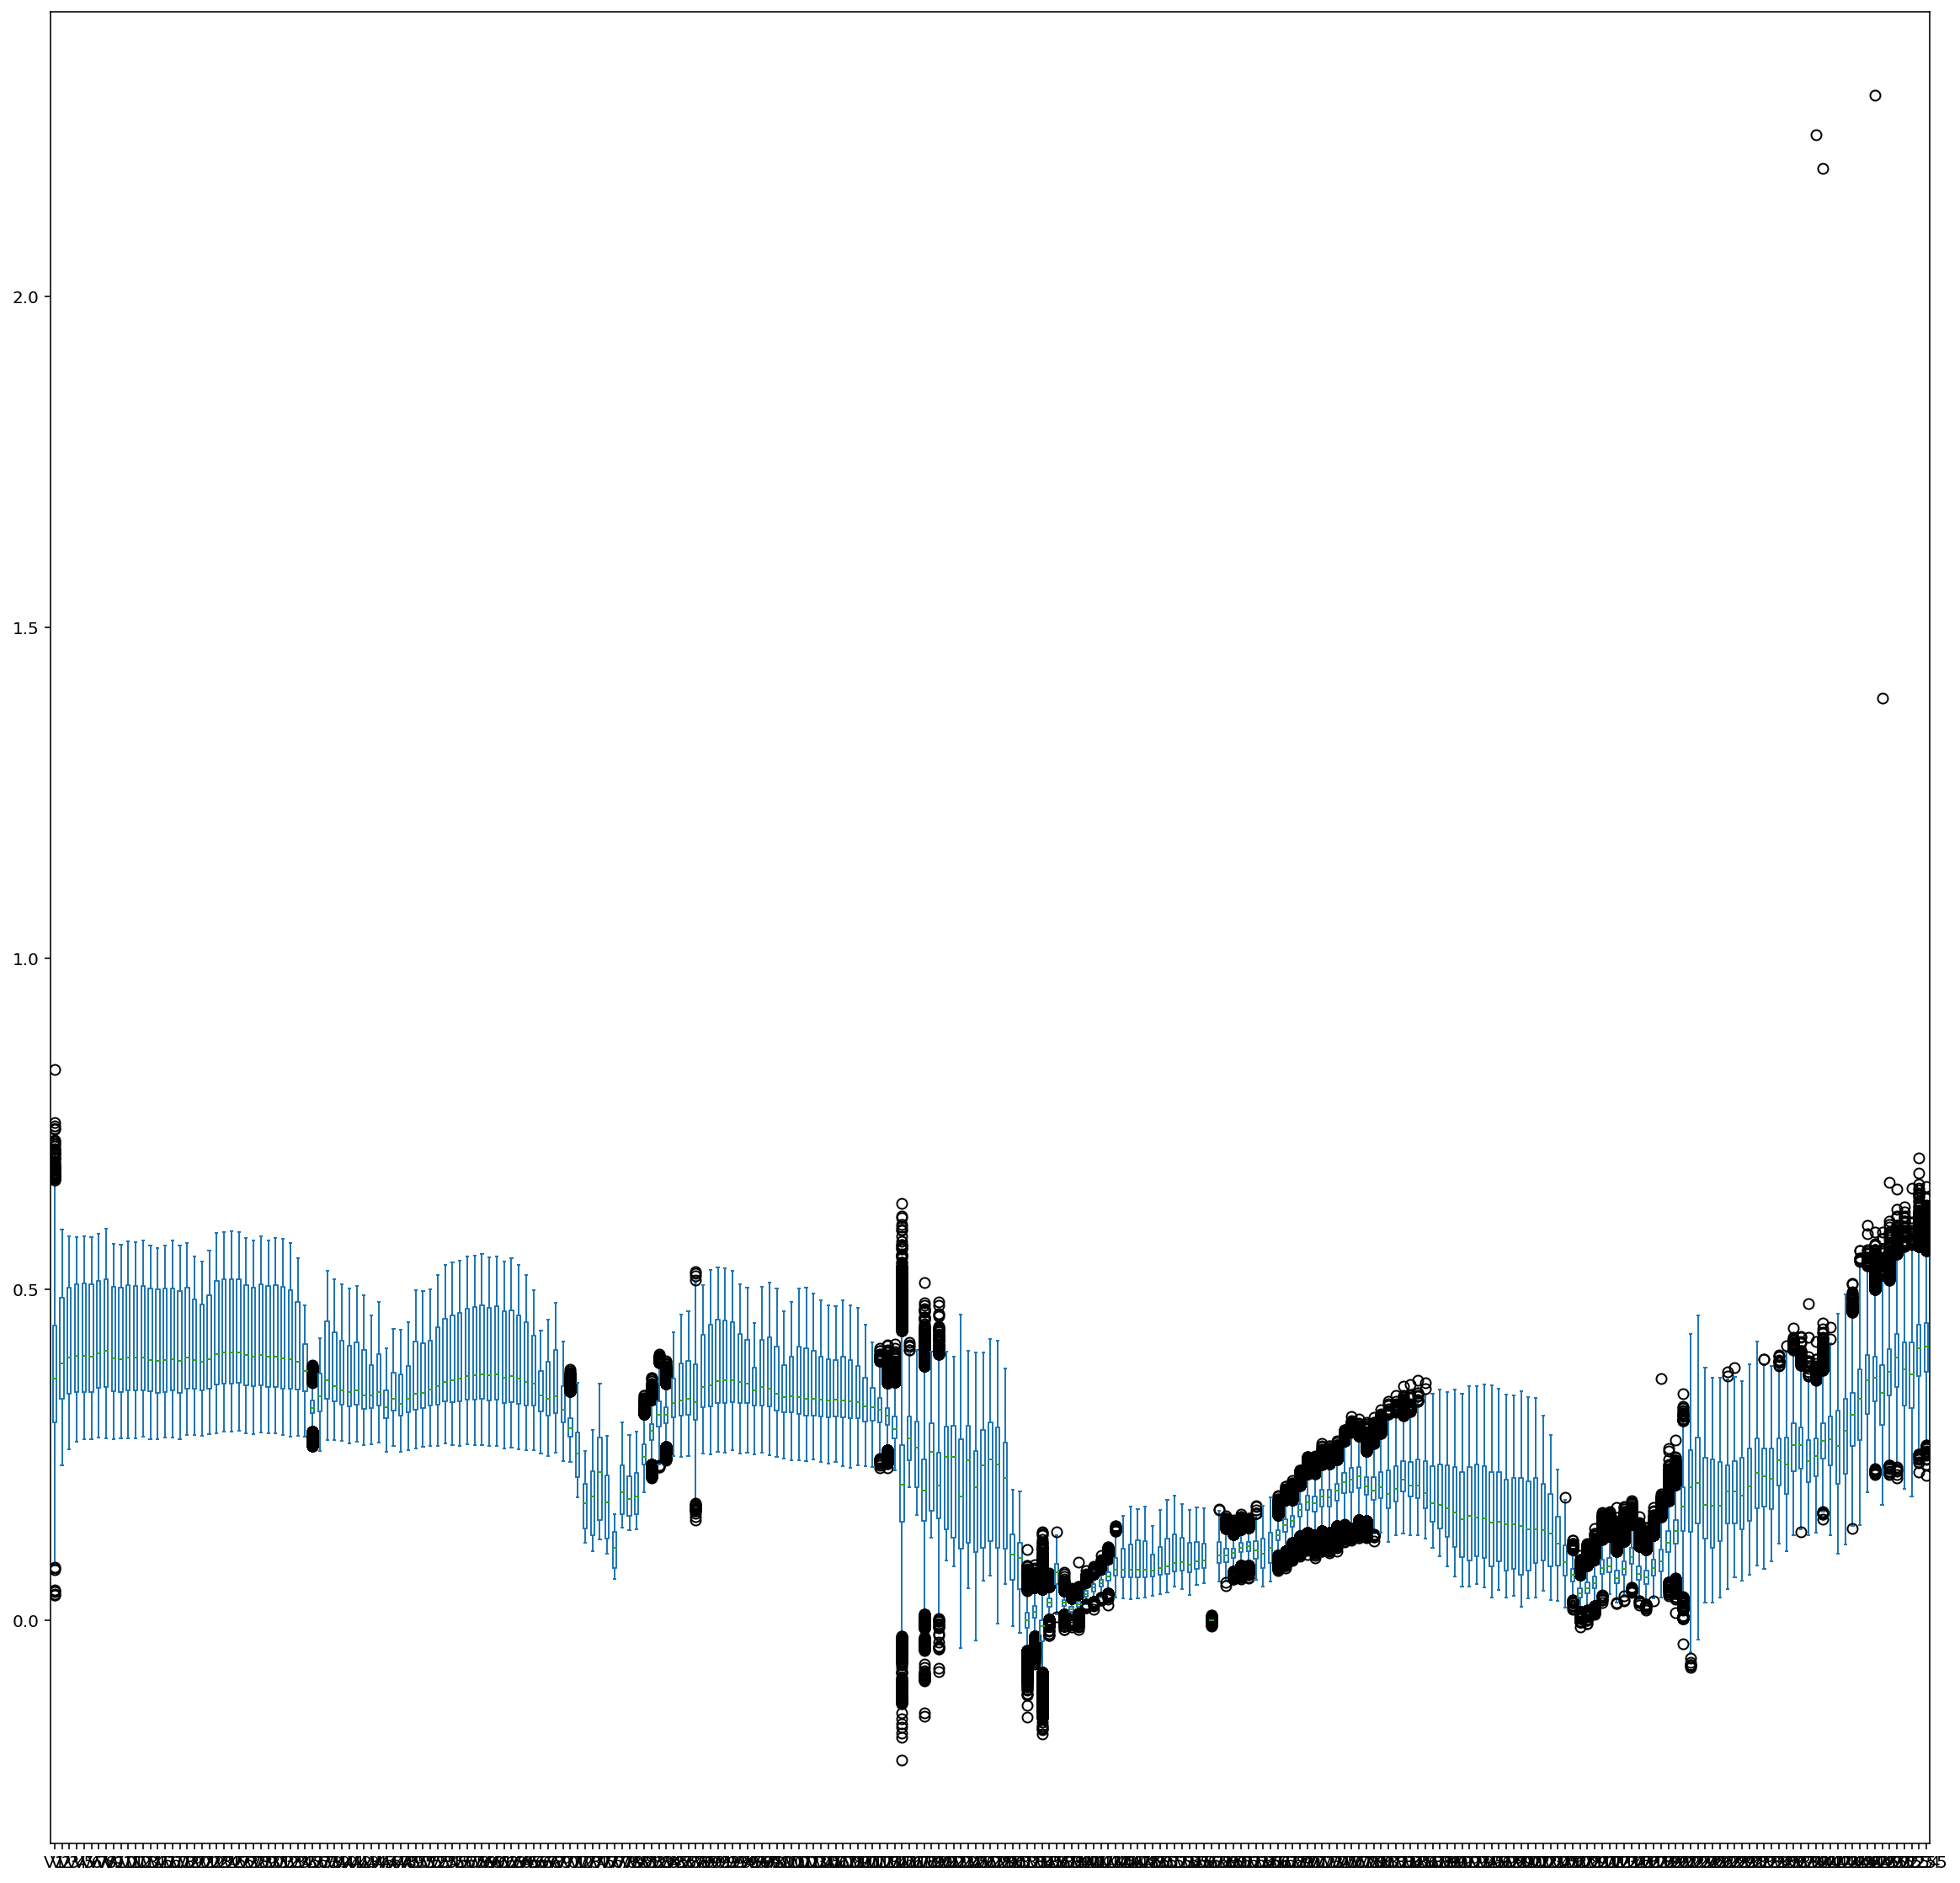

In [7]:
mars.plot.box()

#### (a) What can you say regarding the spread of the different dimensions? 

Some dimension have a very large span regarding to the others. So it's very important to normalize data to avoid them to take a too huge importance in the clustering operation.

#### (b) The symmetry of the data?

There are now perfect symmetry in the features distribution for the data however globally that's quite good as we can see the green line is most time at the near center of the blue box.

#### (c) Outlier values?

For some dimensions there are a lot of outlier (show with a black circle in the box plot).
In particular for some wavelenght (between V200 and V255) there are huge outlier with a value greater than 1.0

### 3.2.3. Should the data be transformed before applying clustering? Why?

Yes it may be a good idea to center and normalize each datapoints.

Because overwise some wavelenght could become artificially important ??? 

### 3.2.4. Conduct the required data transformations/preprocessing. Visualize the new distribution of the transformed data (histograms, box plots), what can you say?

In [8]:
normalized_mars = (mars - mars.mean())/mars.std()

choice = np.random.choice(normalized_mars.columns, size=6)
normalized_mars[choice].plot.hist()
plt.show()

for i, dim in enumerate(choice):
    plt.subplot(2, 3, i+1)
    normalized_mars[dim].plot.hist()
    plt.title(f"Box plot for normalized mars of {dim}")
plt.show()

normalized_mars.plot.box()
plt.show()

Maybe deleting outlier and replacing them with artificial value could also be beneficial.

## 3.3 Dimensionality reduction

### 3.3.1. Using the appropriate `scikit-learn` package, conduct a **Principal Component Analysis decomposition** of the reduced MARS data.

In [10]:
features_dim = 40
pca = PCA(n_components=features_dim)

pca.fit(normalized_mars)

PCA(n_components=40)

### 3.3.2. Visualize the explained variance as a function of the number of dimensions selected. We can use the `pca.explained_variance_ratio_` argument from the scikit learn PCA implementation.


In [11]:
def get_pca_explained_variance(X, features_dim: int):
    pca = PCA(n_components=features_dim)
    pca.fit(X)
    explained_variance_ratio = pca.explained_variance_ratio_
    return explained_variance_ratio


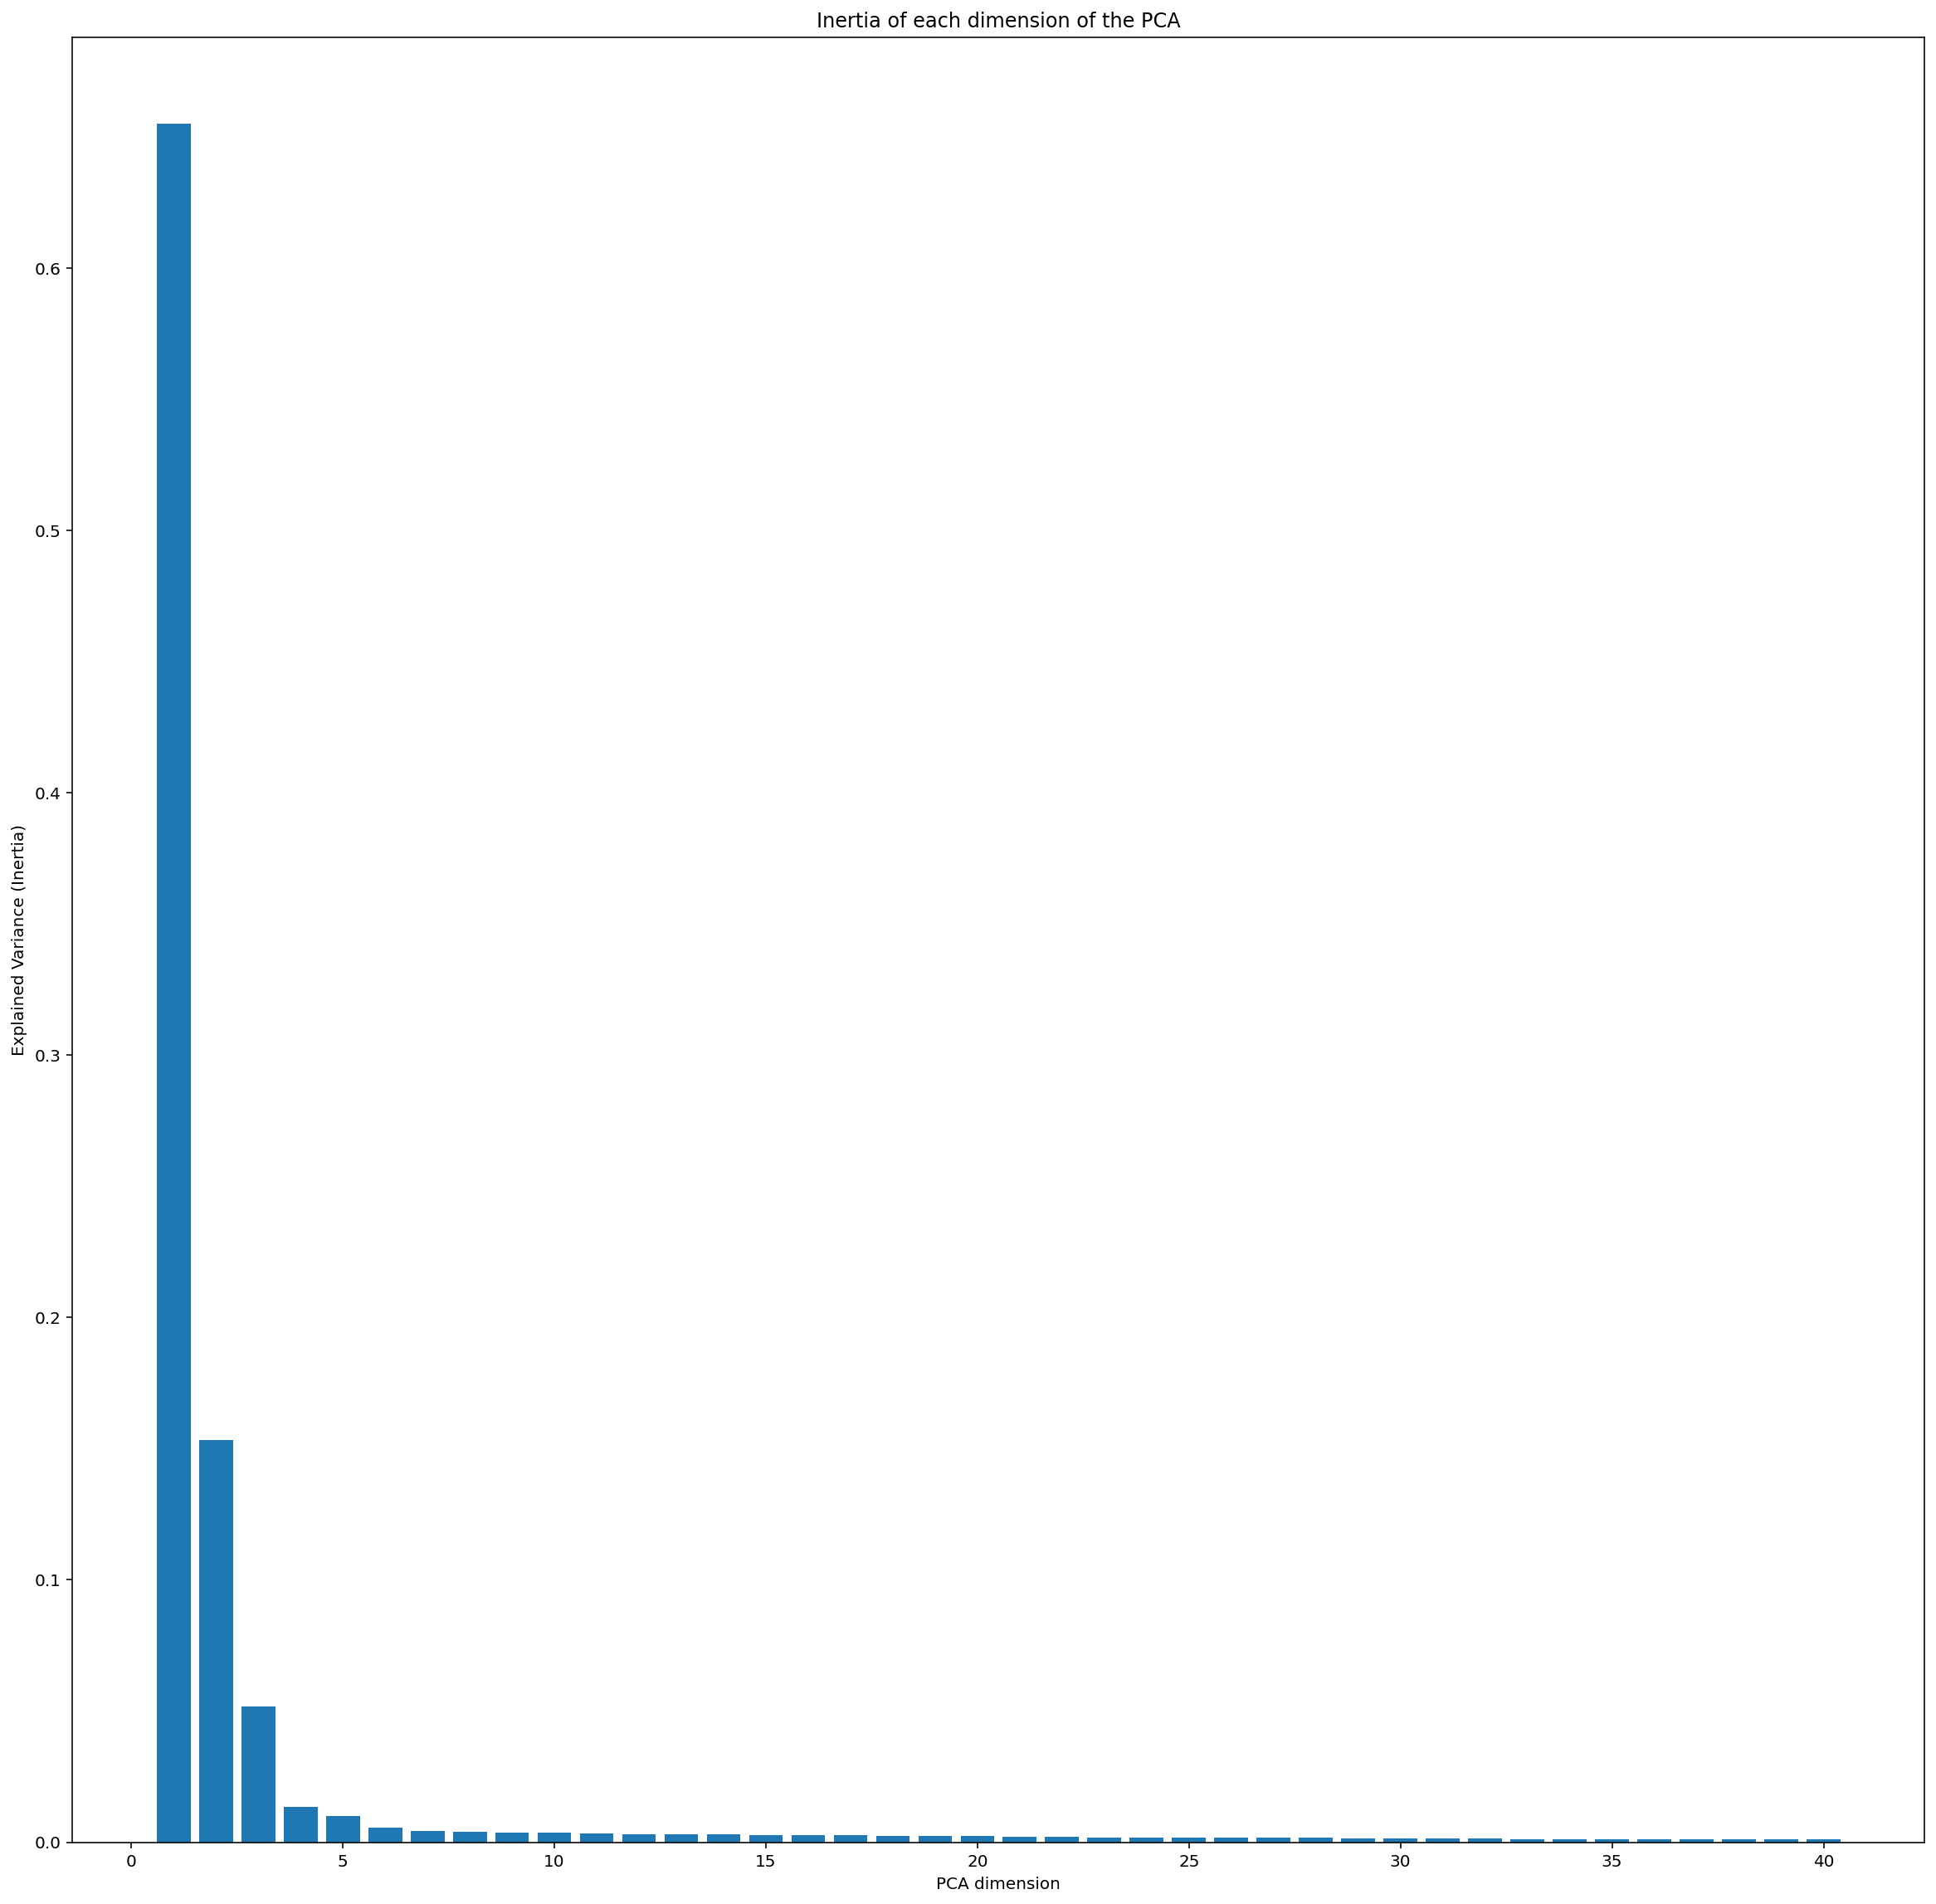

In [12]:
explained_variance_list = []
explained_variance_ratio = get_pca_explained_variance(
    normalized_mars, features_dim=40)

plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
plt.xlabel("PCA dimension")
plt.ylabel("Explained Variance (Inertia)")
plt.title("Inertia of each dimension of the PCA")
plt.show()


Most of the inertia is locate in the first 3 dimensions

In [13]:
features_dim = 2
pca2d = PCA(n_components=features_dim)
pca2d.fit(normalized_mars)
normalized_mars_2d = pca2d.transform(normalized_mars)

features_dim = 3
pca3d = PCA(n_components=features_dim)
pca3d.fit(normalized_mars)
normalized_mars_3d = pca3d.transform(normalized_mars)

### 3.3.3. Plot the Variable factor map for the first two PCA dimensions. What can you say?


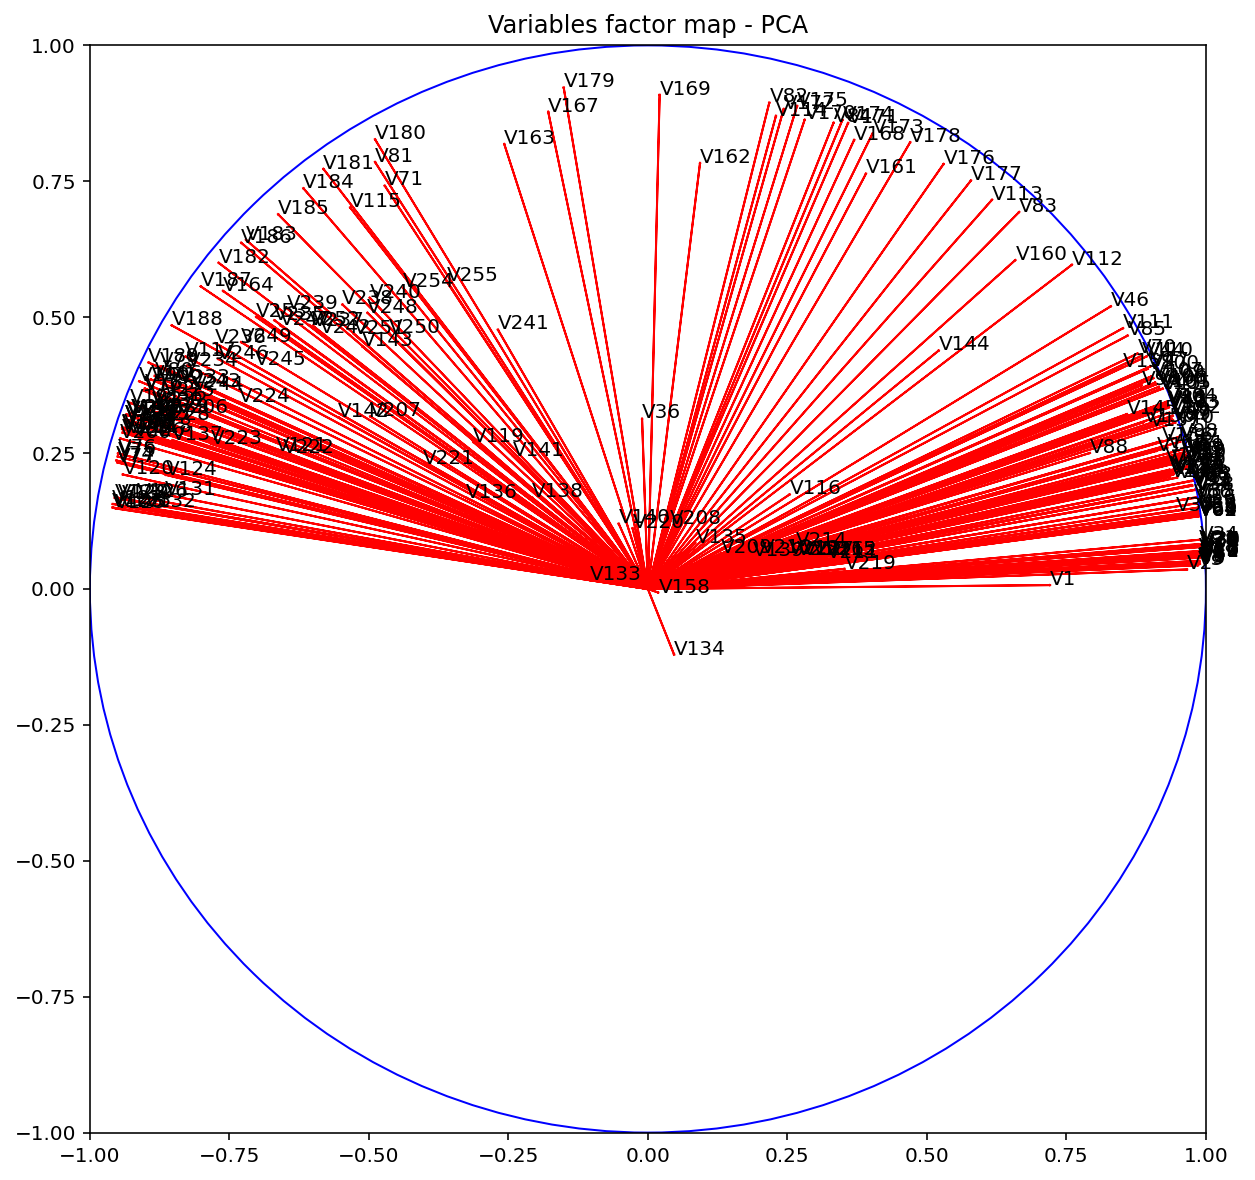

In [14]:
coord1 = pca2d.components_[0] * np.sqrt(pca2d.explained_variance_[0])
coord2 = pca2d.components_[1] * np.sqrt(pca2d.explained_variance_[1])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, normalized_mars.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color='r', width=0.0001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

### 3.3.4. Plot the Individuals factor map for the first two PCA dimensions. What can you say?

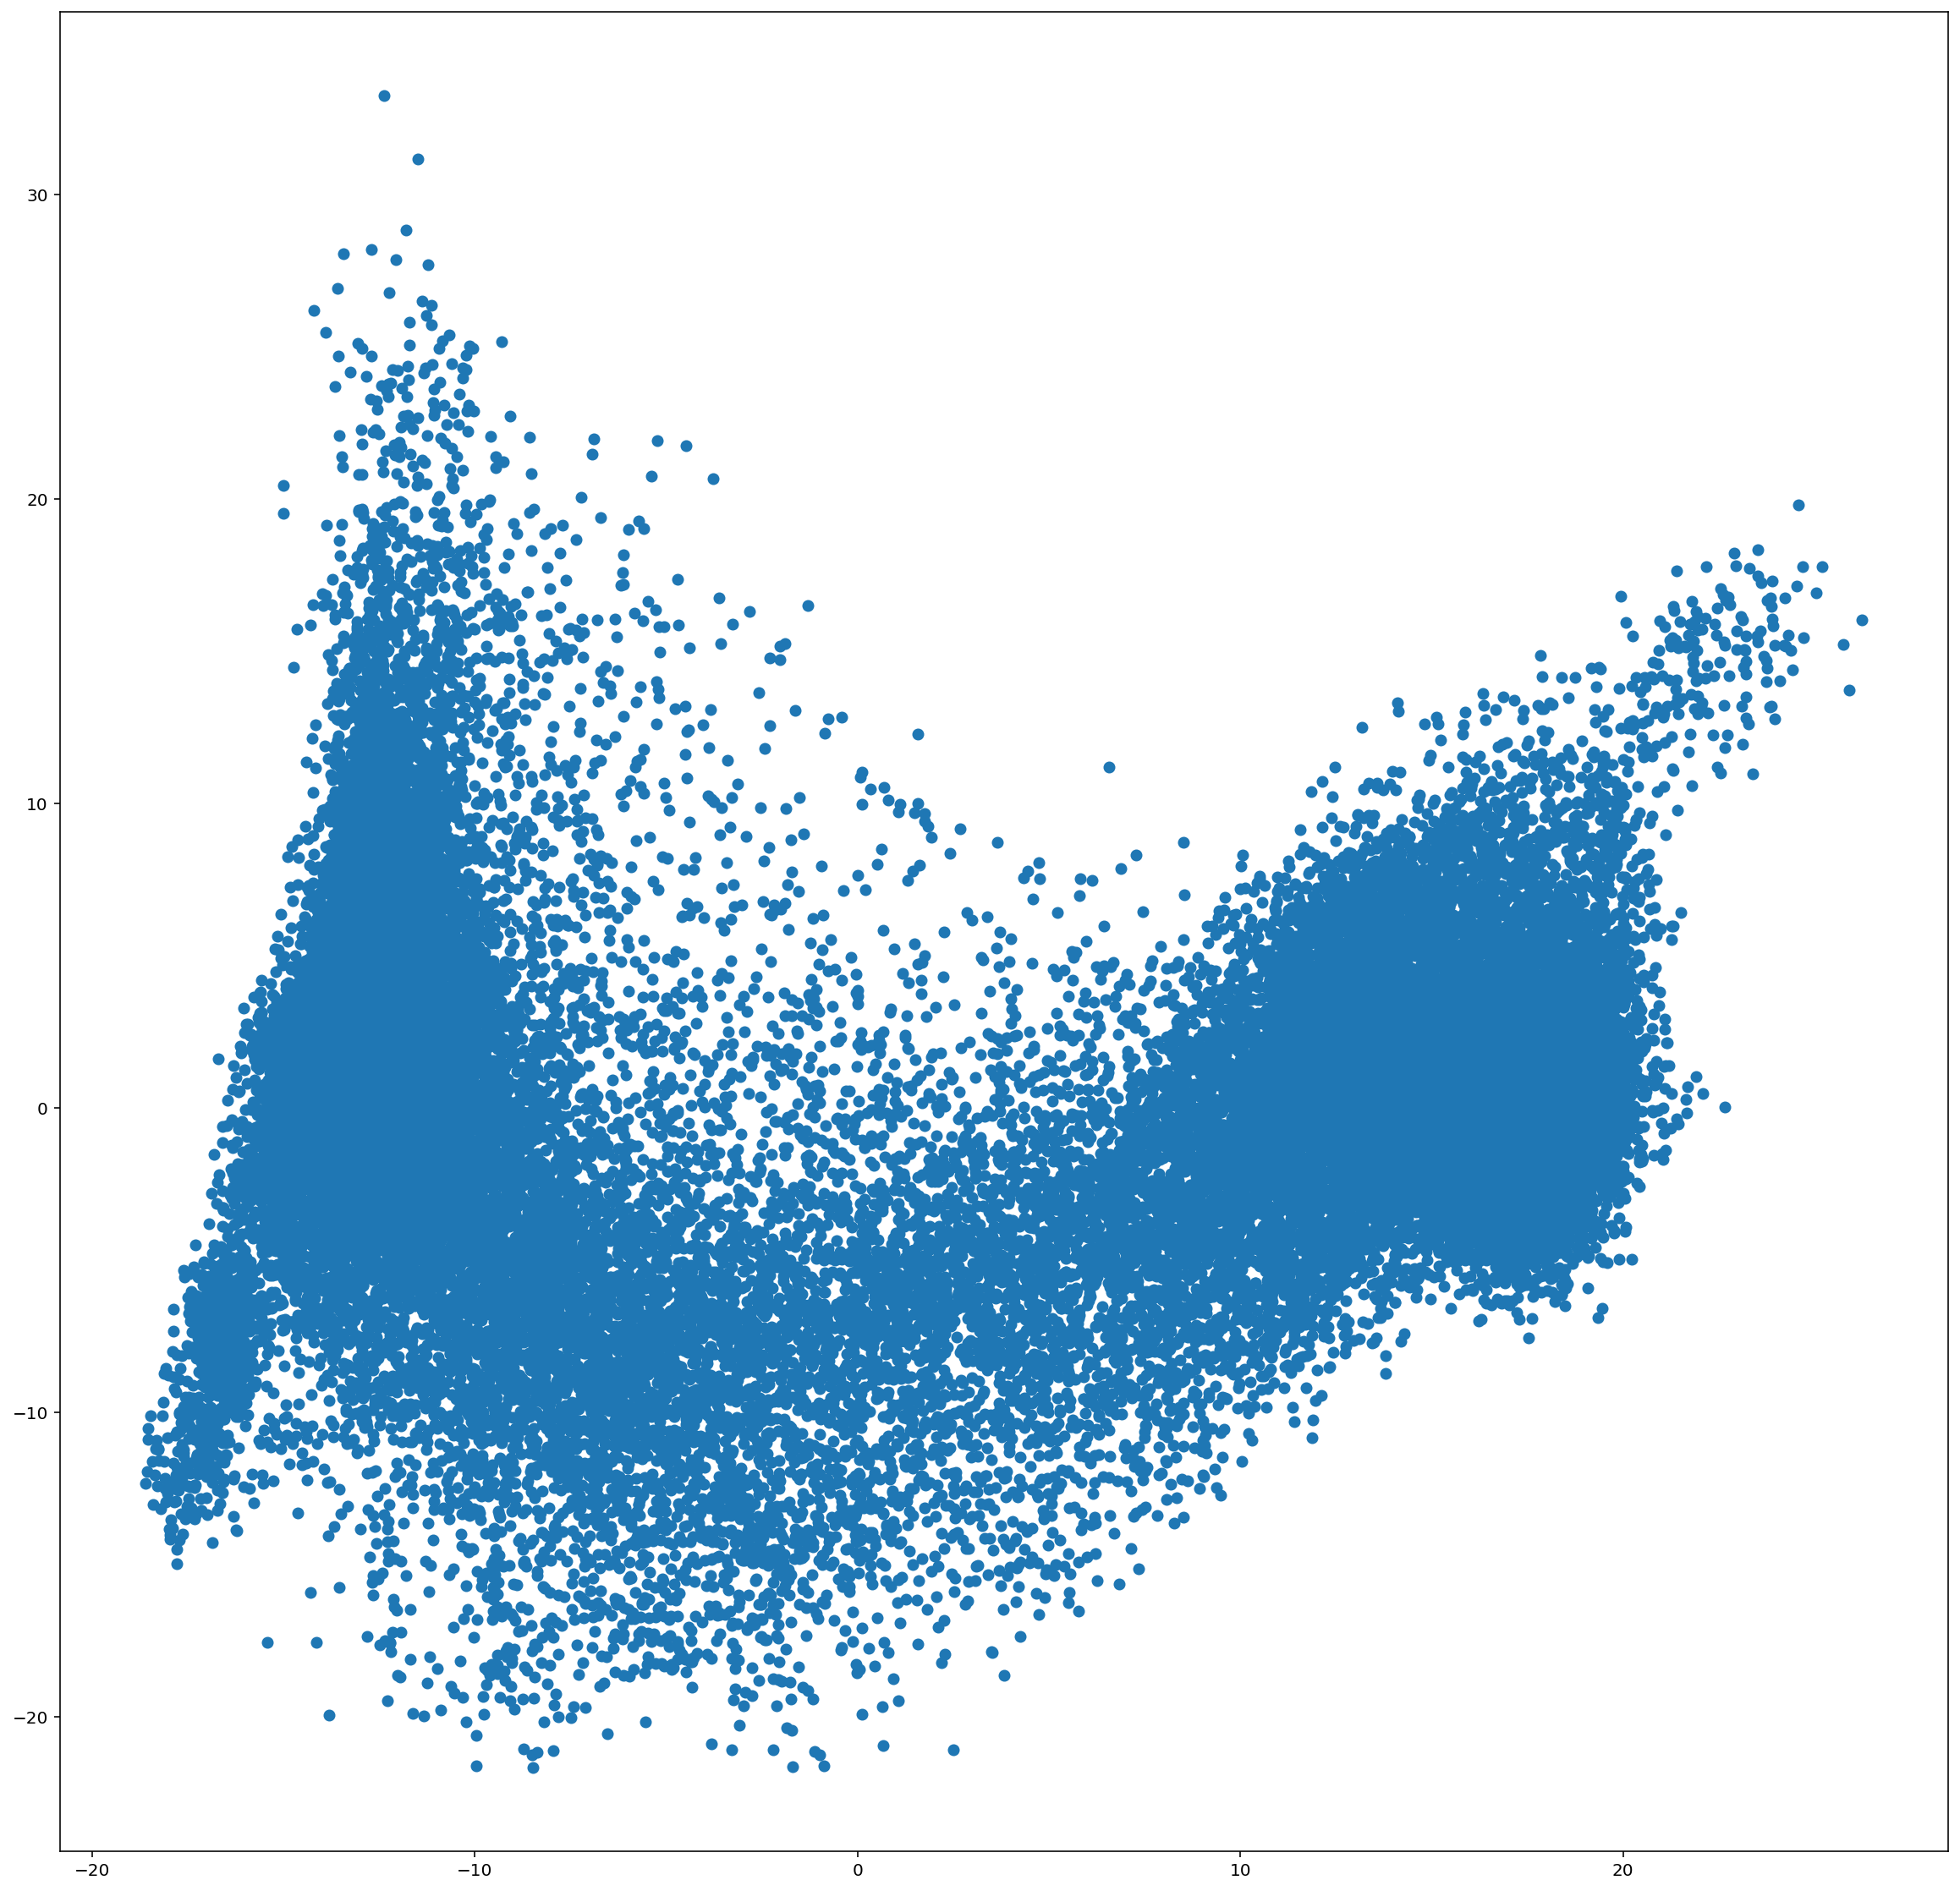

In [15]:
plt.scatter(normalized_mars_2d[:, 0], normalized_mars_2d[:, 1])

### 3.3.5. How many dimensions should be used to conduct a cluster analysis?

$2$ or $3$ dimensions may be enough

# 4 Clustering

## 4.1 K-means

In [16]:
from sklearn.cluster import KMeans

### 4.1.1. How can we choose the number of clusters K to apply K-means on these data?

To select the optimal number of clusters $K$ we can use one of the two following method:
- The Elbow method
- The Silhouette method

##### The Elbow method

Plot the inertia $I$ as a function of the number of clusters.
$$I=\sum_{i=0}^n \min_{k \in \{1, ..., K\}} (||x_i - c_k||^2)$$
Inertia is always decreasing when more clusters are added (clusters get tighter).

However, when good groups are formed, inertia start decreasing _less_.

Hence, __choose the number of clusters corresponding to the last big drop in I (the _elbow_ of the curve)__.

##### The silhouette method

The silhouette was seen in the previous slides. It takes into account both the points within a cluster but also from other clusters, Hence, it should not be always decreasing when K increases.

By plotting the silhouette curve for different values of K, we can simply choose the number of clusters with the highest silhouette.

_Exercise: Try to compute the silhouette curve for the toy example. Make K vary from 2 to 10._

### 4.1.2. Conduct one of the two methods? What K should be chosen?


##### The Elbow method

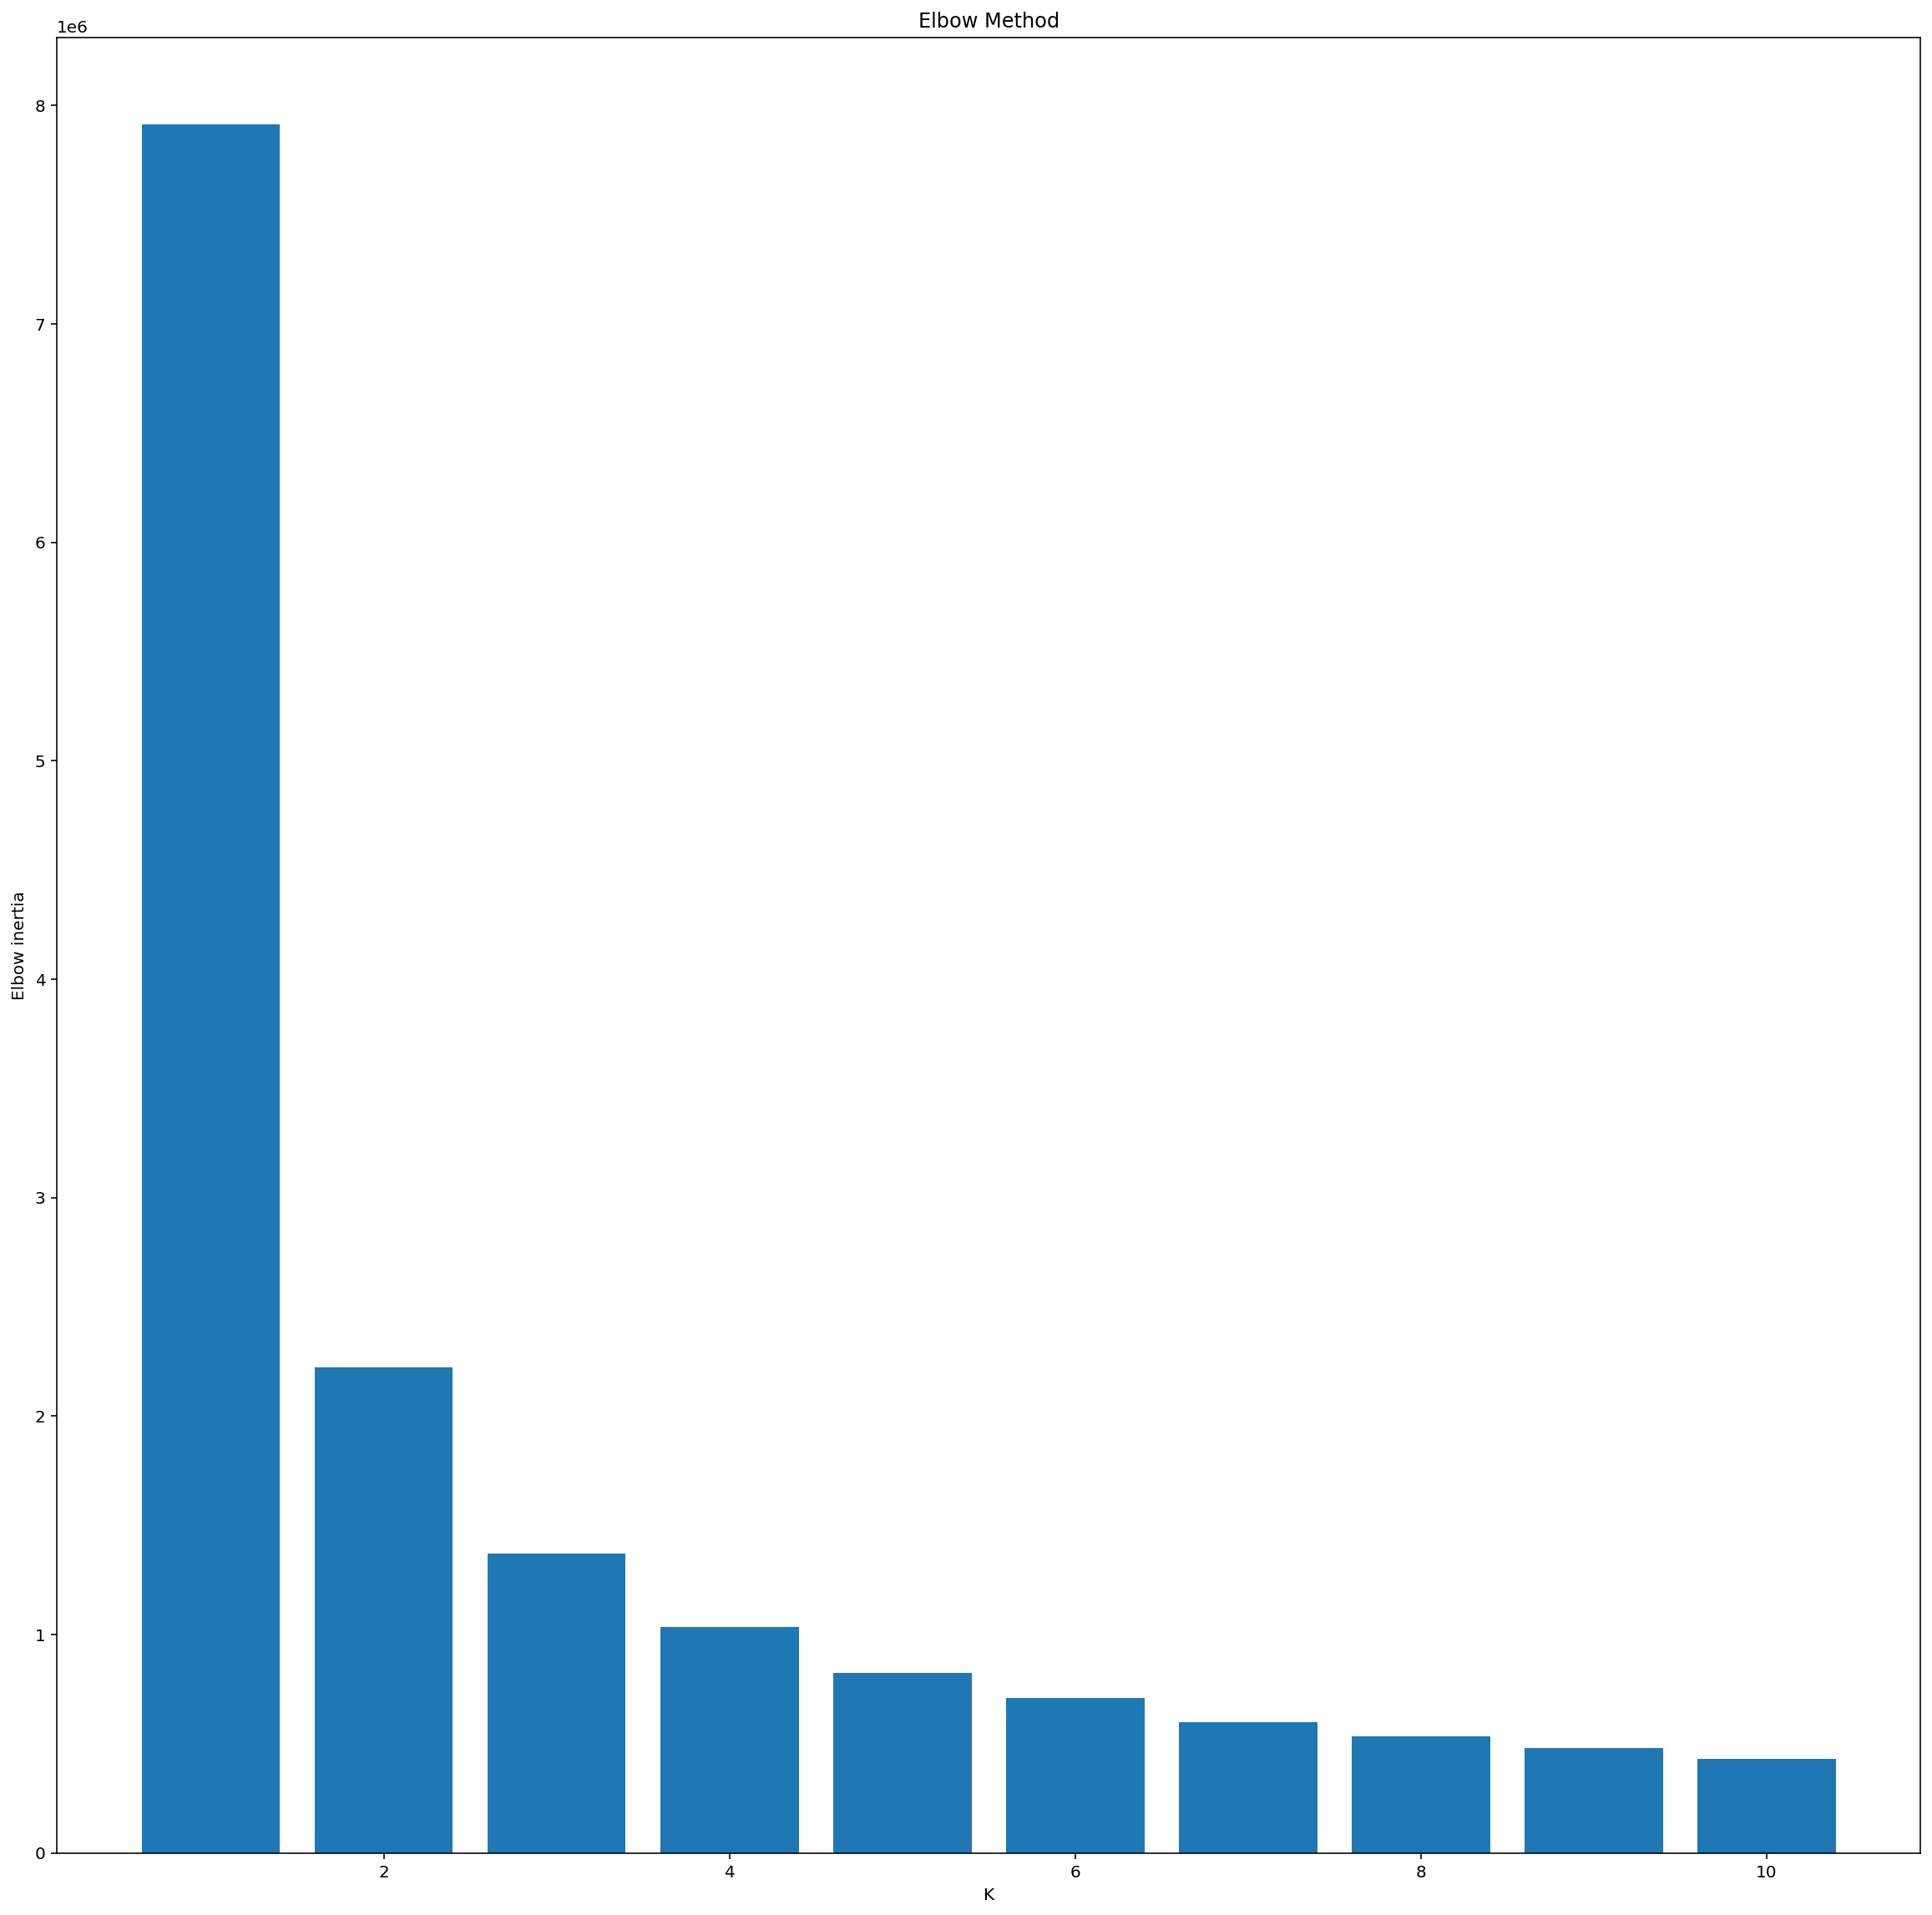

In [17]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_mars_2d)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.bar(range(1, 11), inertia)
plt.xlabel("K")
plt.ylabel("Elbow inertia")
plt.title("Elbow Method")
plt.show()

##### The silhouette method

In [20]:
# from sklearn.metrics import silhouette_score

# silhouette = []
# for k in range(2, 5):
#     kmeans = KMeans(n_clusters=k)
#     clusters = kmeans.fit_predict(normalized_mars_2d)
#     silhouette.append(silhouette_score(normalized_mars_2d, clusters))
# silhouette = np.array(silhouette)

# plt.bar(range(2, 5), silhouette)
# plt.show()

$K = 4$ of $5$ may be enough

### 4.1.3. In practice, the experts tell us that the number of different geological compositions in this image is $5$. Apply K-means on the selected PCA dimensions, with this value of $K$.

In [21]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(normalized_mars_2d)

KMeans(n_clusters=5)

### 4.1.4. Display the clusters in the PCA Individual factor map.

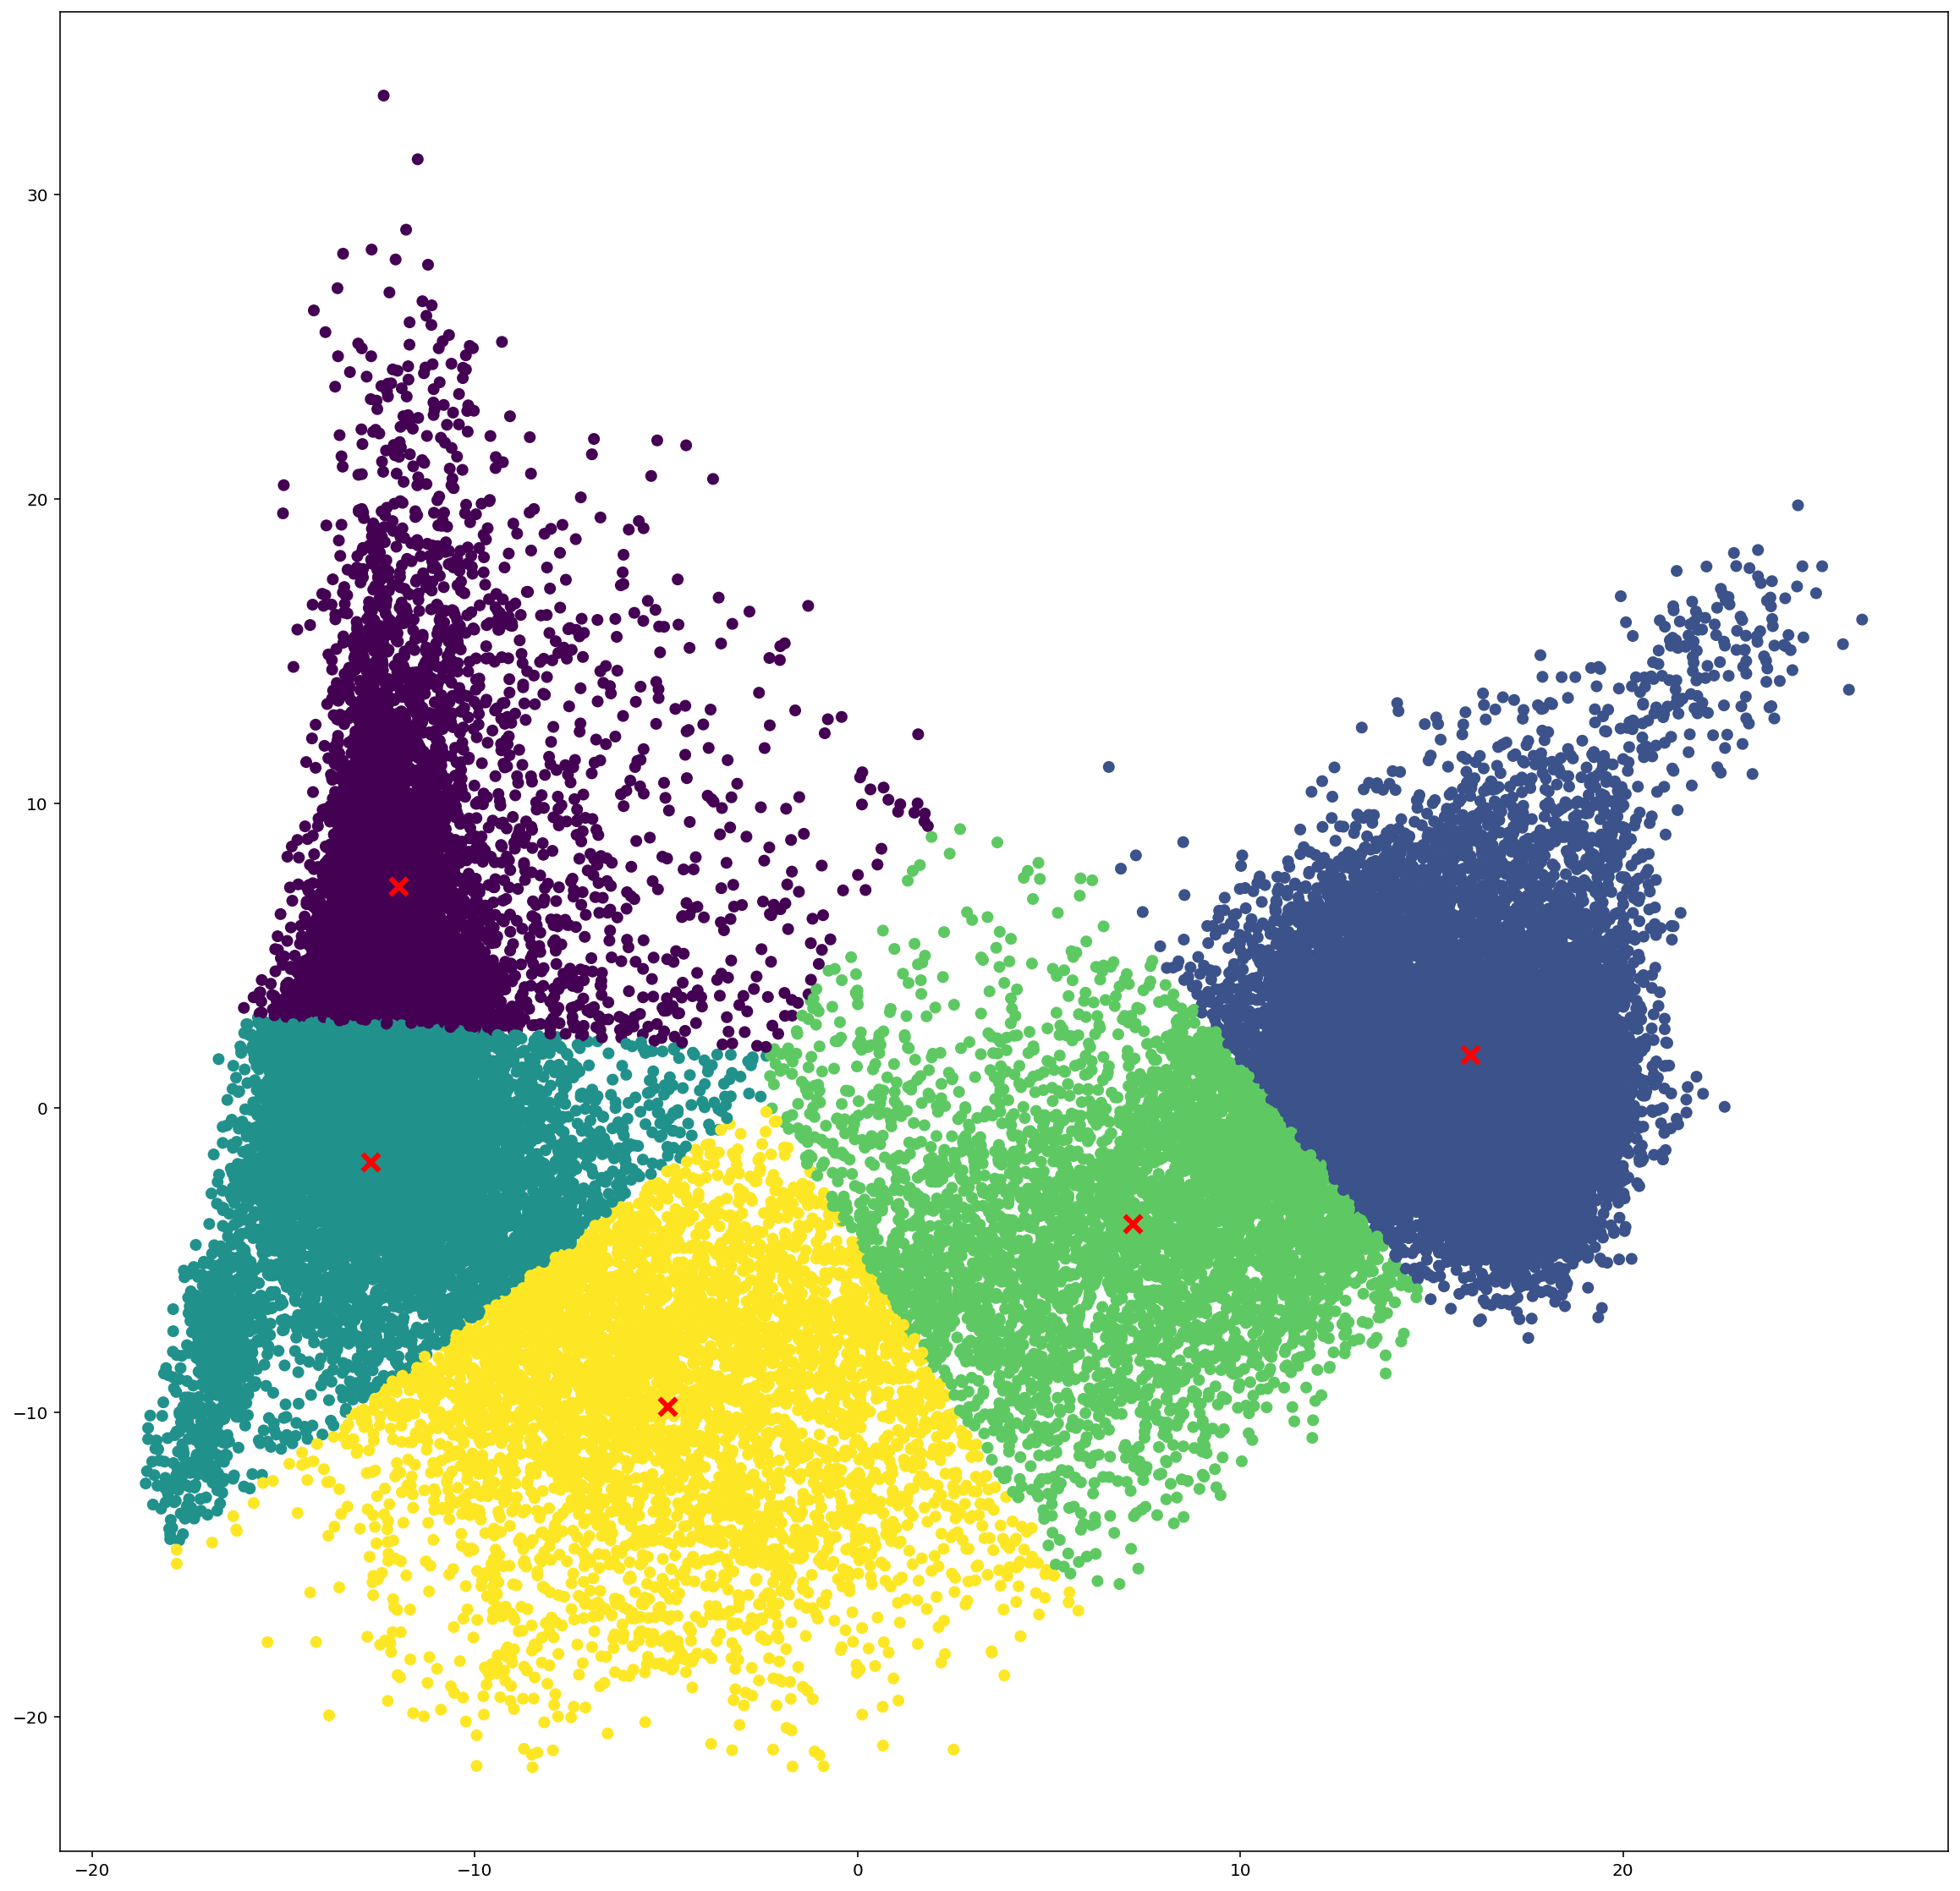

In [22]:
clusters = kmeans5.predict(normalized_mars_2d)
centroids = kmeans5.cluster_centers_

plt.scatter(normalized_mars_2d[:, 0], normalized_mars_2d[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c="r", marker="x", s=100, linewidths=3)
plt.show()

### 4.1.5. Display the 300x128 image where the pixels represent the clusters. We can use the reshape function.

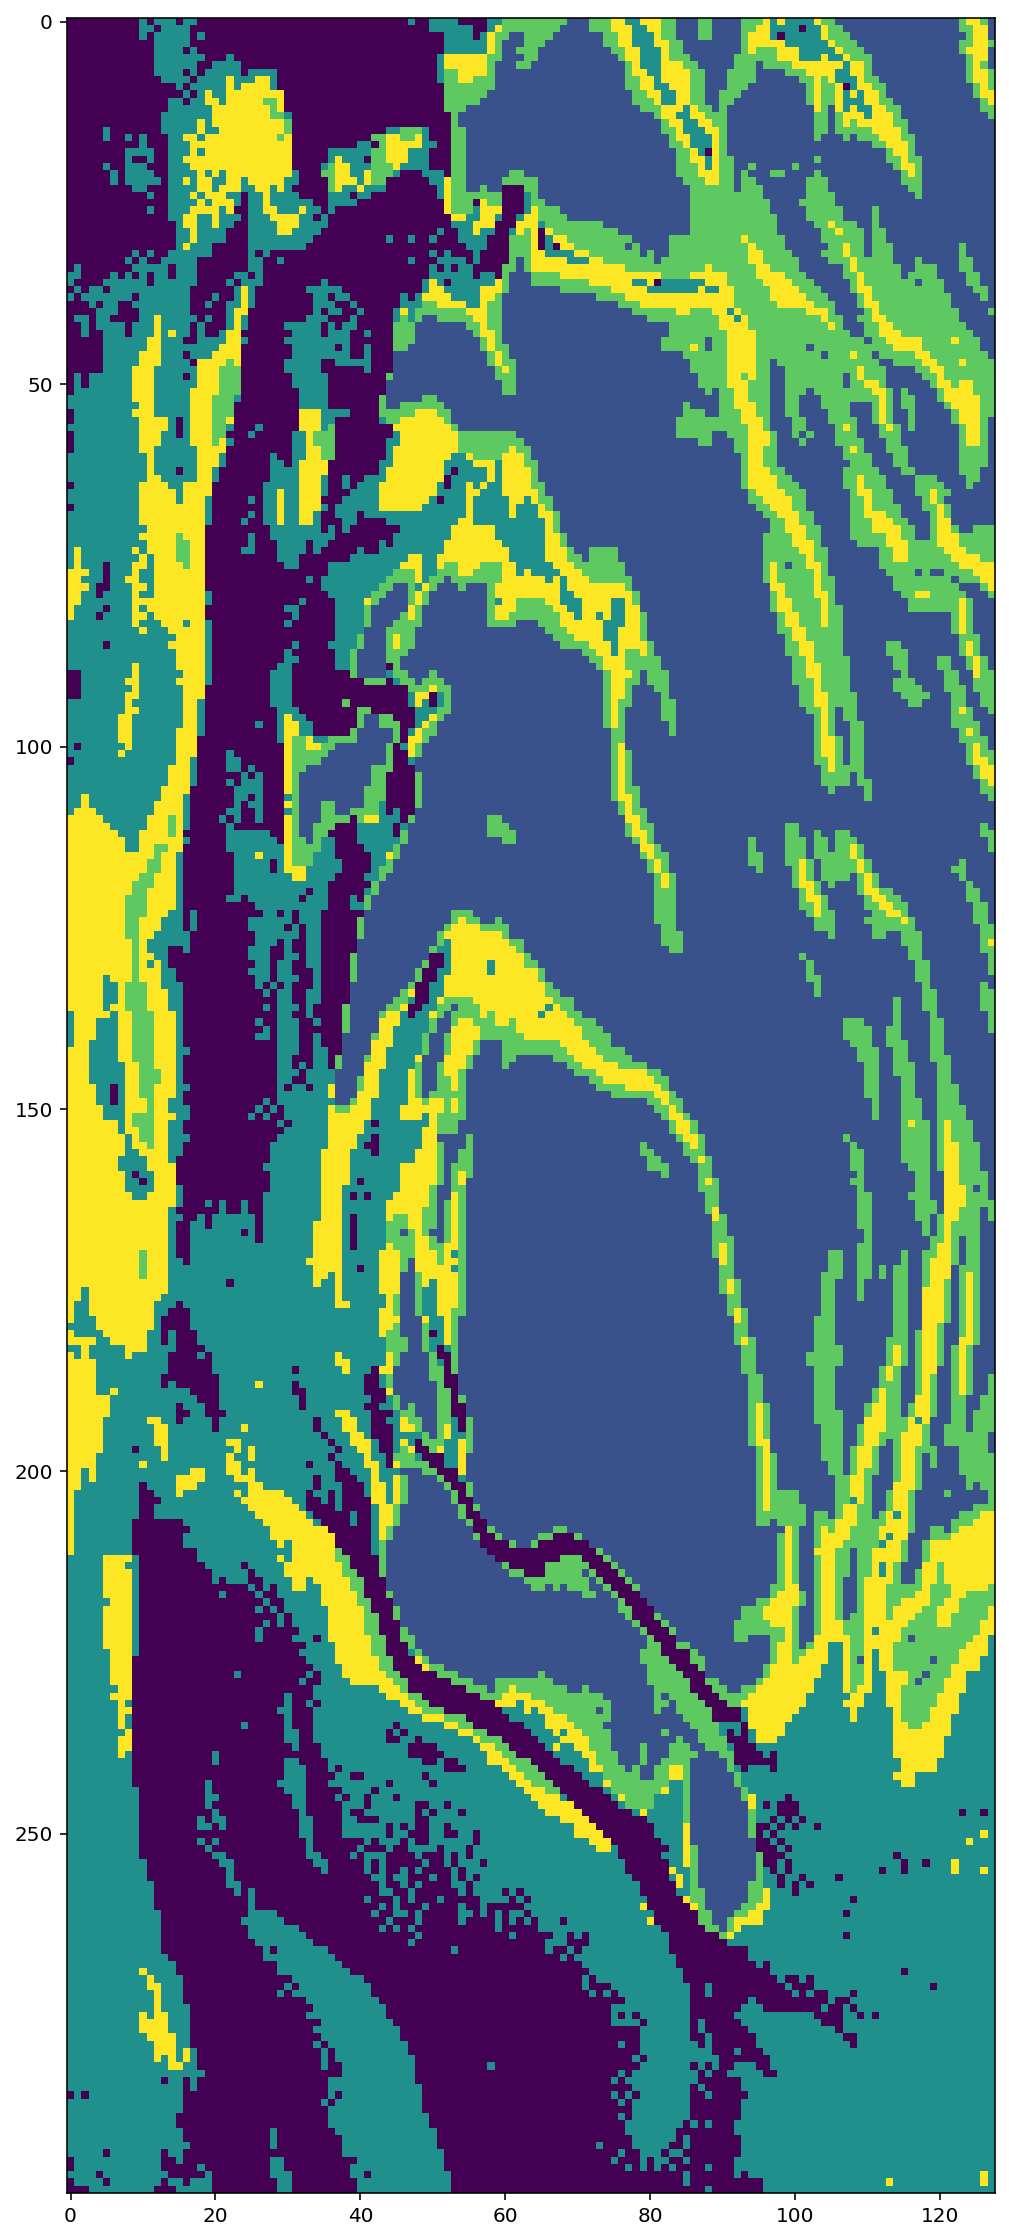

In [23]:
clusters_image = clusters.reshape((300, 128))
plt.imshow(clusters_image)

### 4.1.6. Plot the curves representing the values of the wave lengths of the cluster centers.

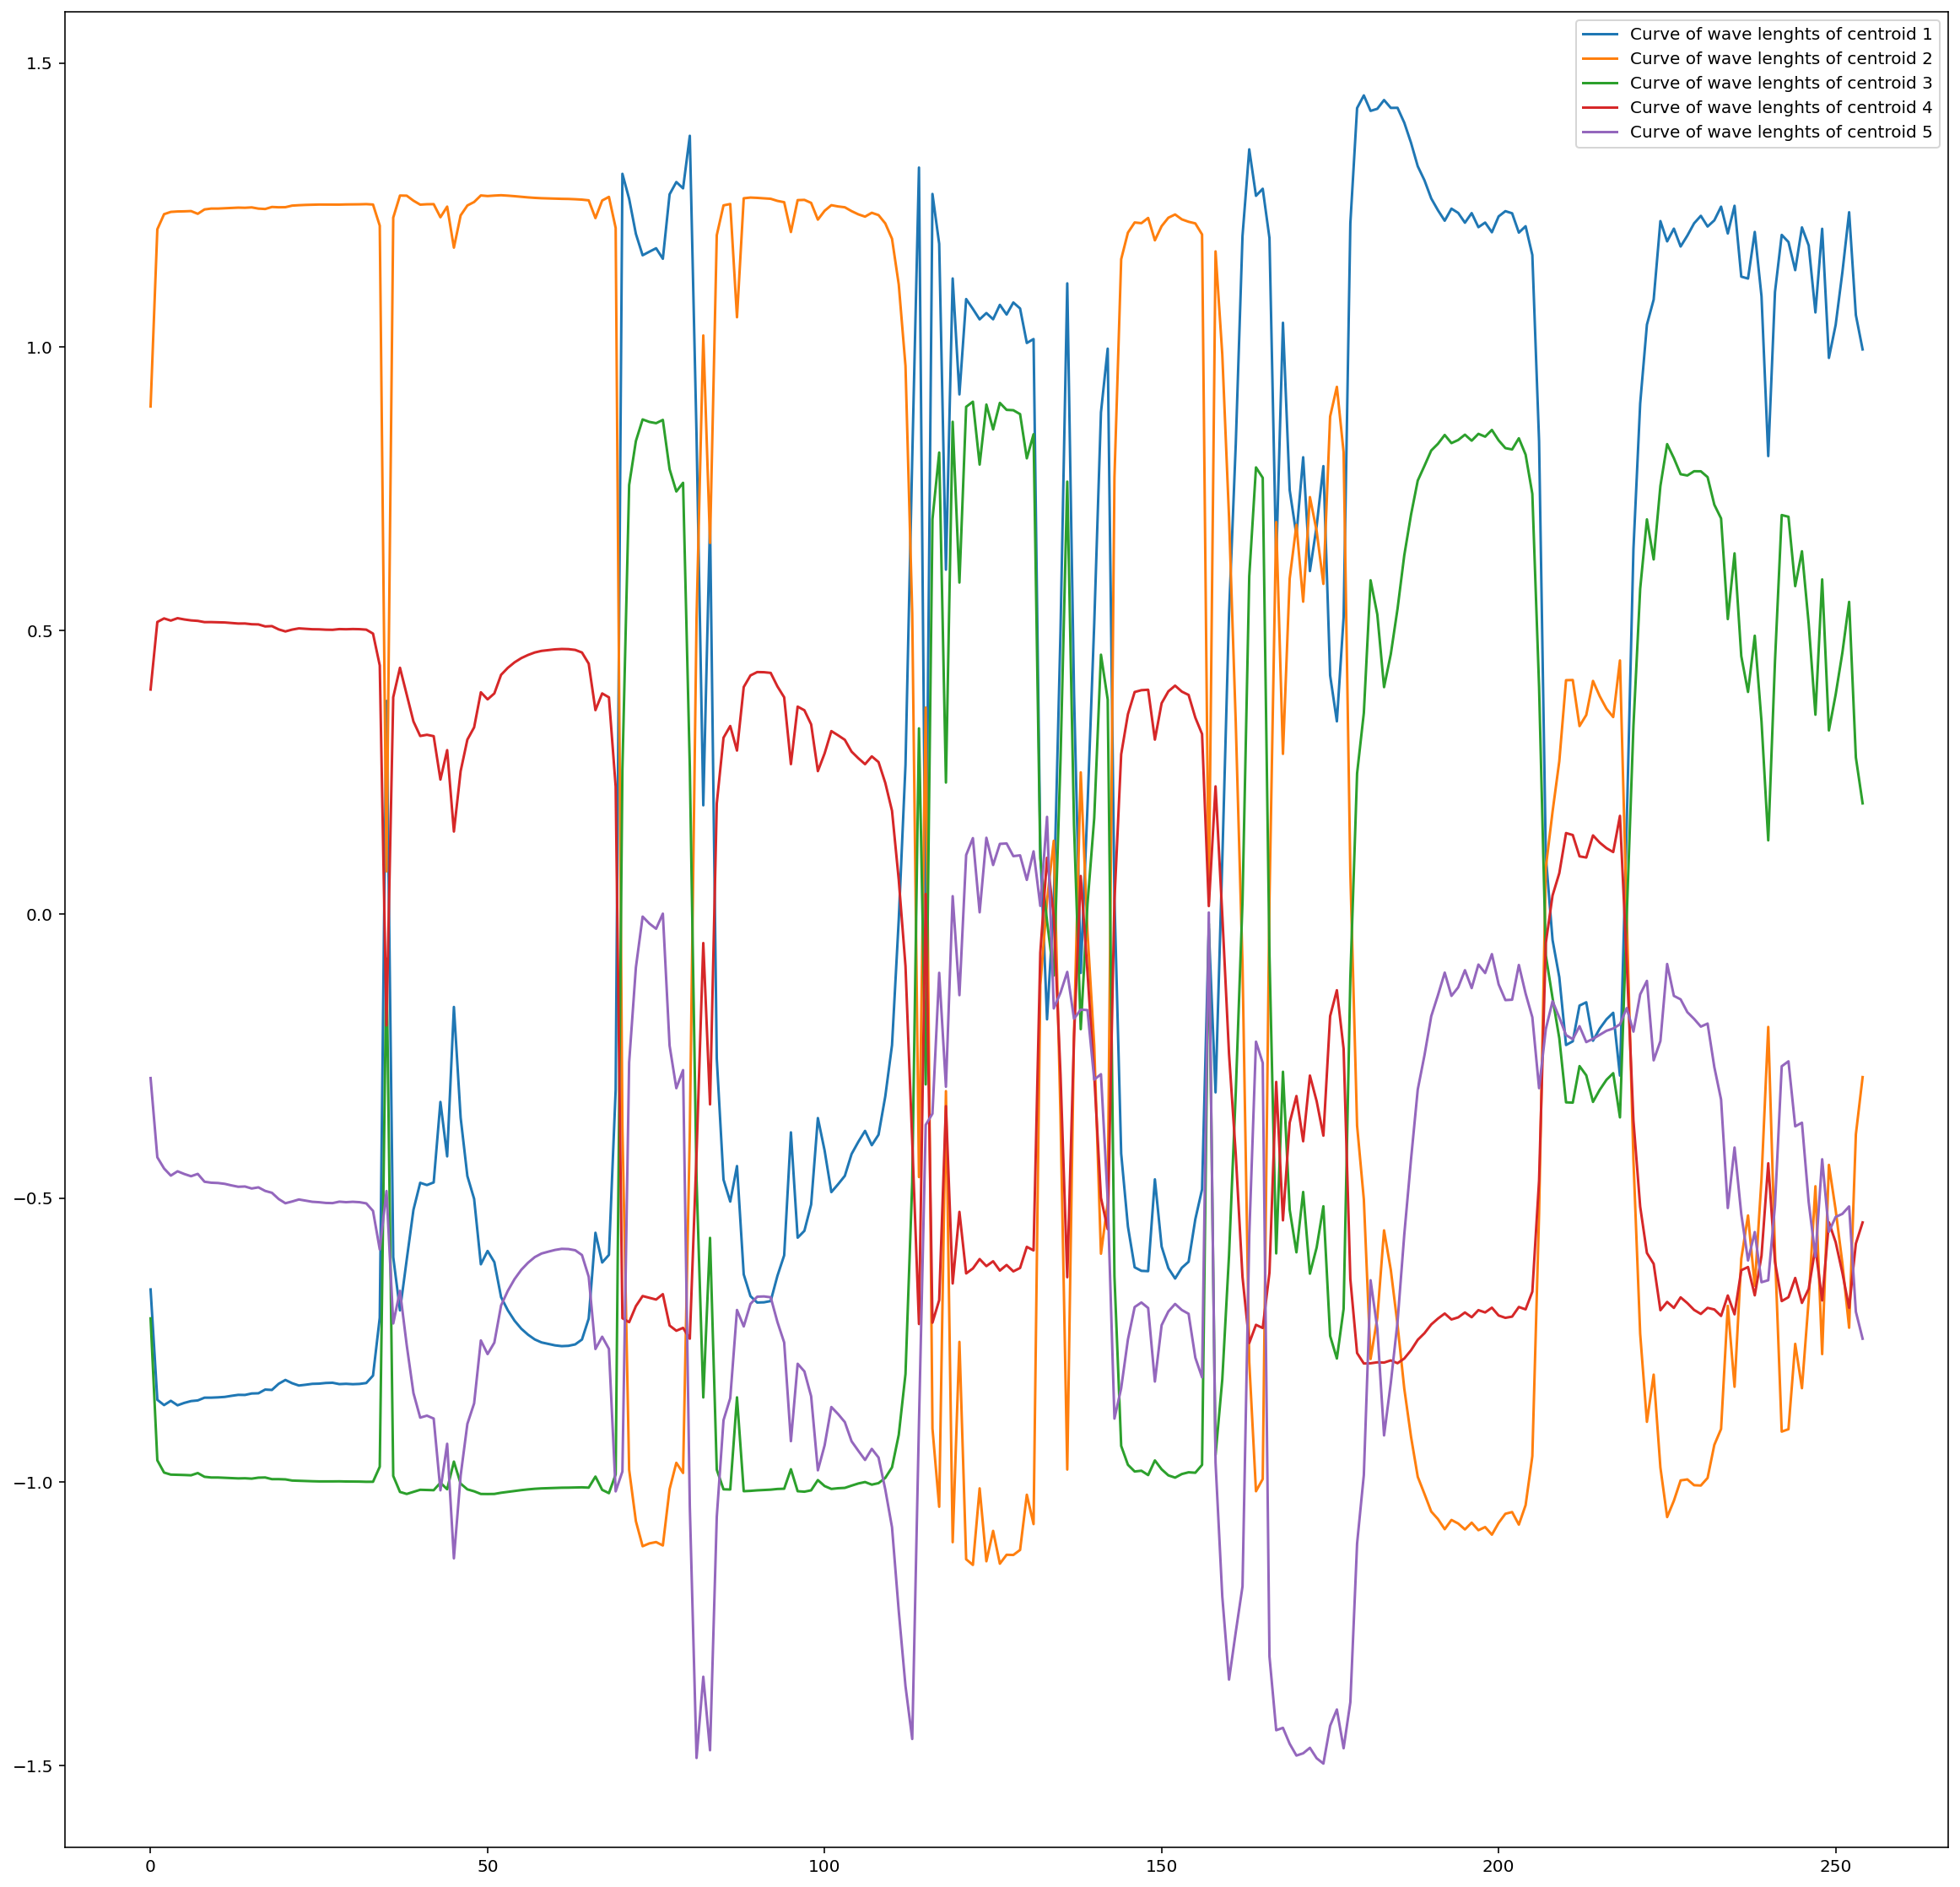

In [24]:
centroids_255 = pca2d.inverse_transform(centroids)

for i, centroid_255 in enumerate(centroids_255):
    plt.plot(centroid_255, label=f"Curve of wave lenghts of centroid {i+1}")
plt.legend()
plt.show()


### 4.1.7. Repeat the process using the complete data instead of the data reduced with PCA. Compare the two results using external metrics (normalized mutual information, Fowlkes Mallows). Are the clusters obtained similar?

In [25]:
kmeans5_full = KMeans(n_clusters=5)
kmeans5_full.fit(normalized_mars)

clusters_full = kmeans5_full.predict(normalized_mars)
centroids_full = kmeans5_full.cluster_centers_


In [26]:
centroids_full[3].shape

(255,)

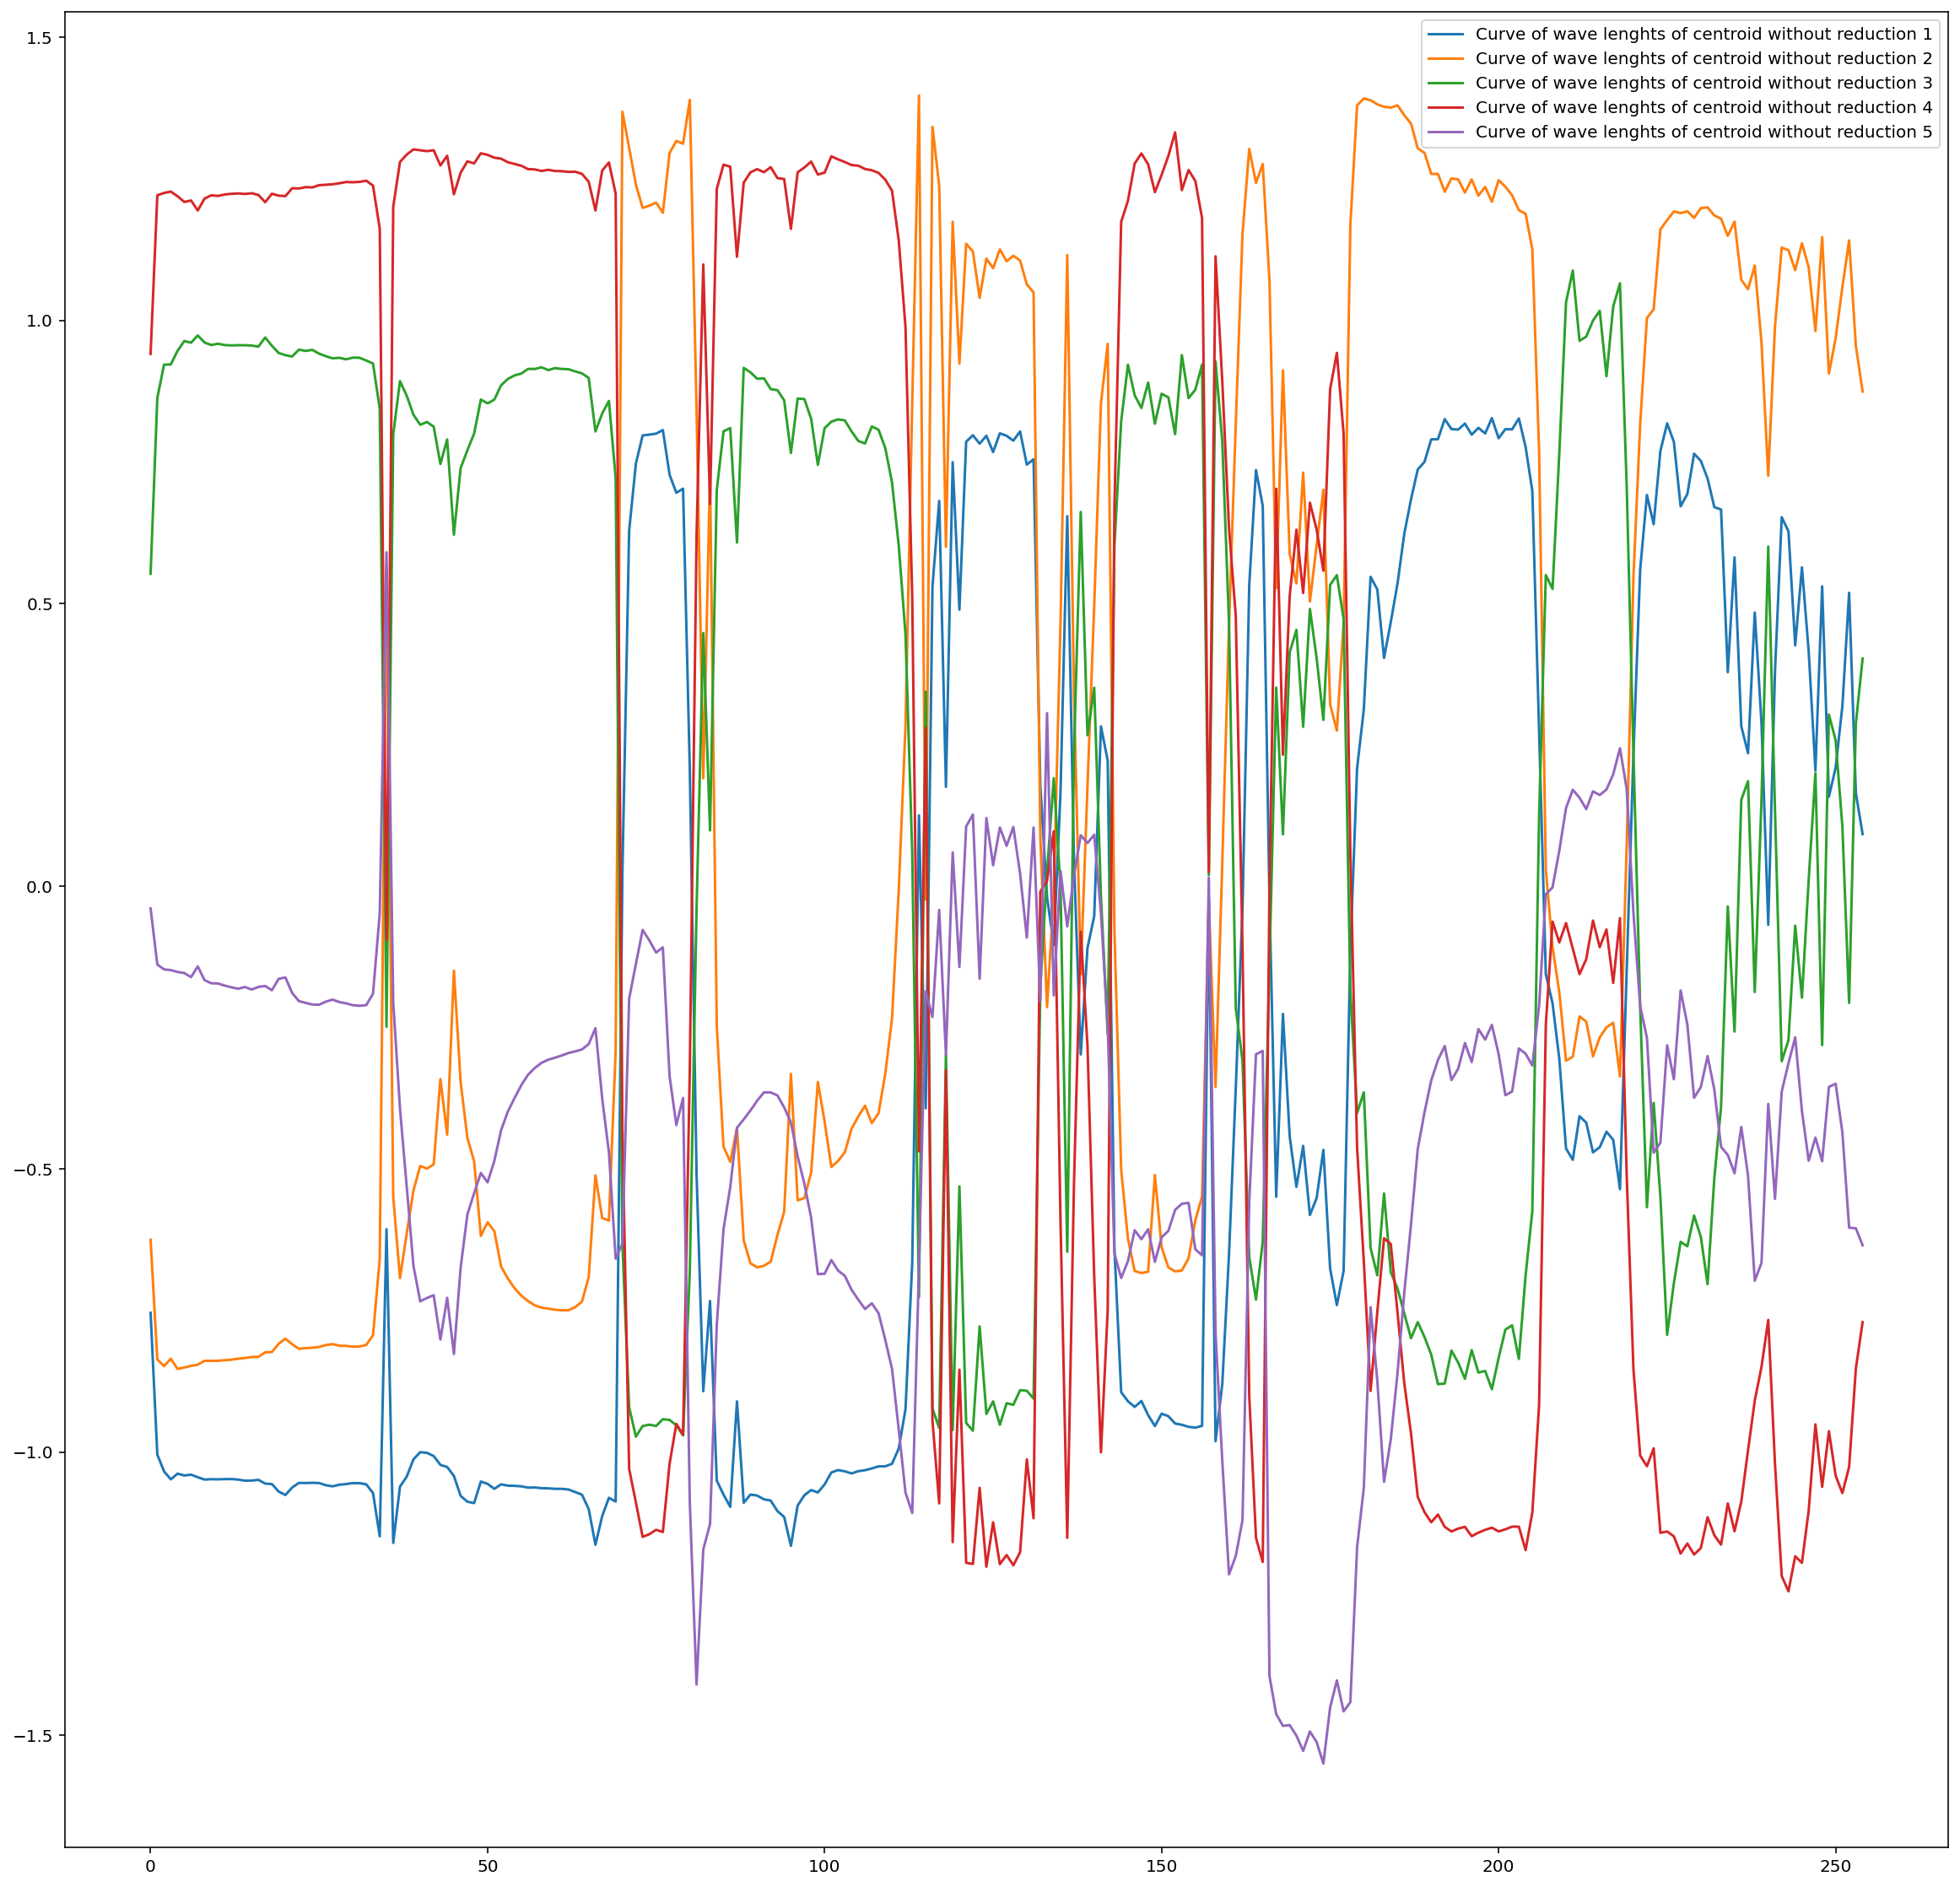

In [27]:
for i, centroid_full in enumerate(centroids_full):
    plt.plot(centroid_full,
             label=f"Curve of wave lenghts of centroid without reduction {i+1}")
plt.legend()
plt.show()


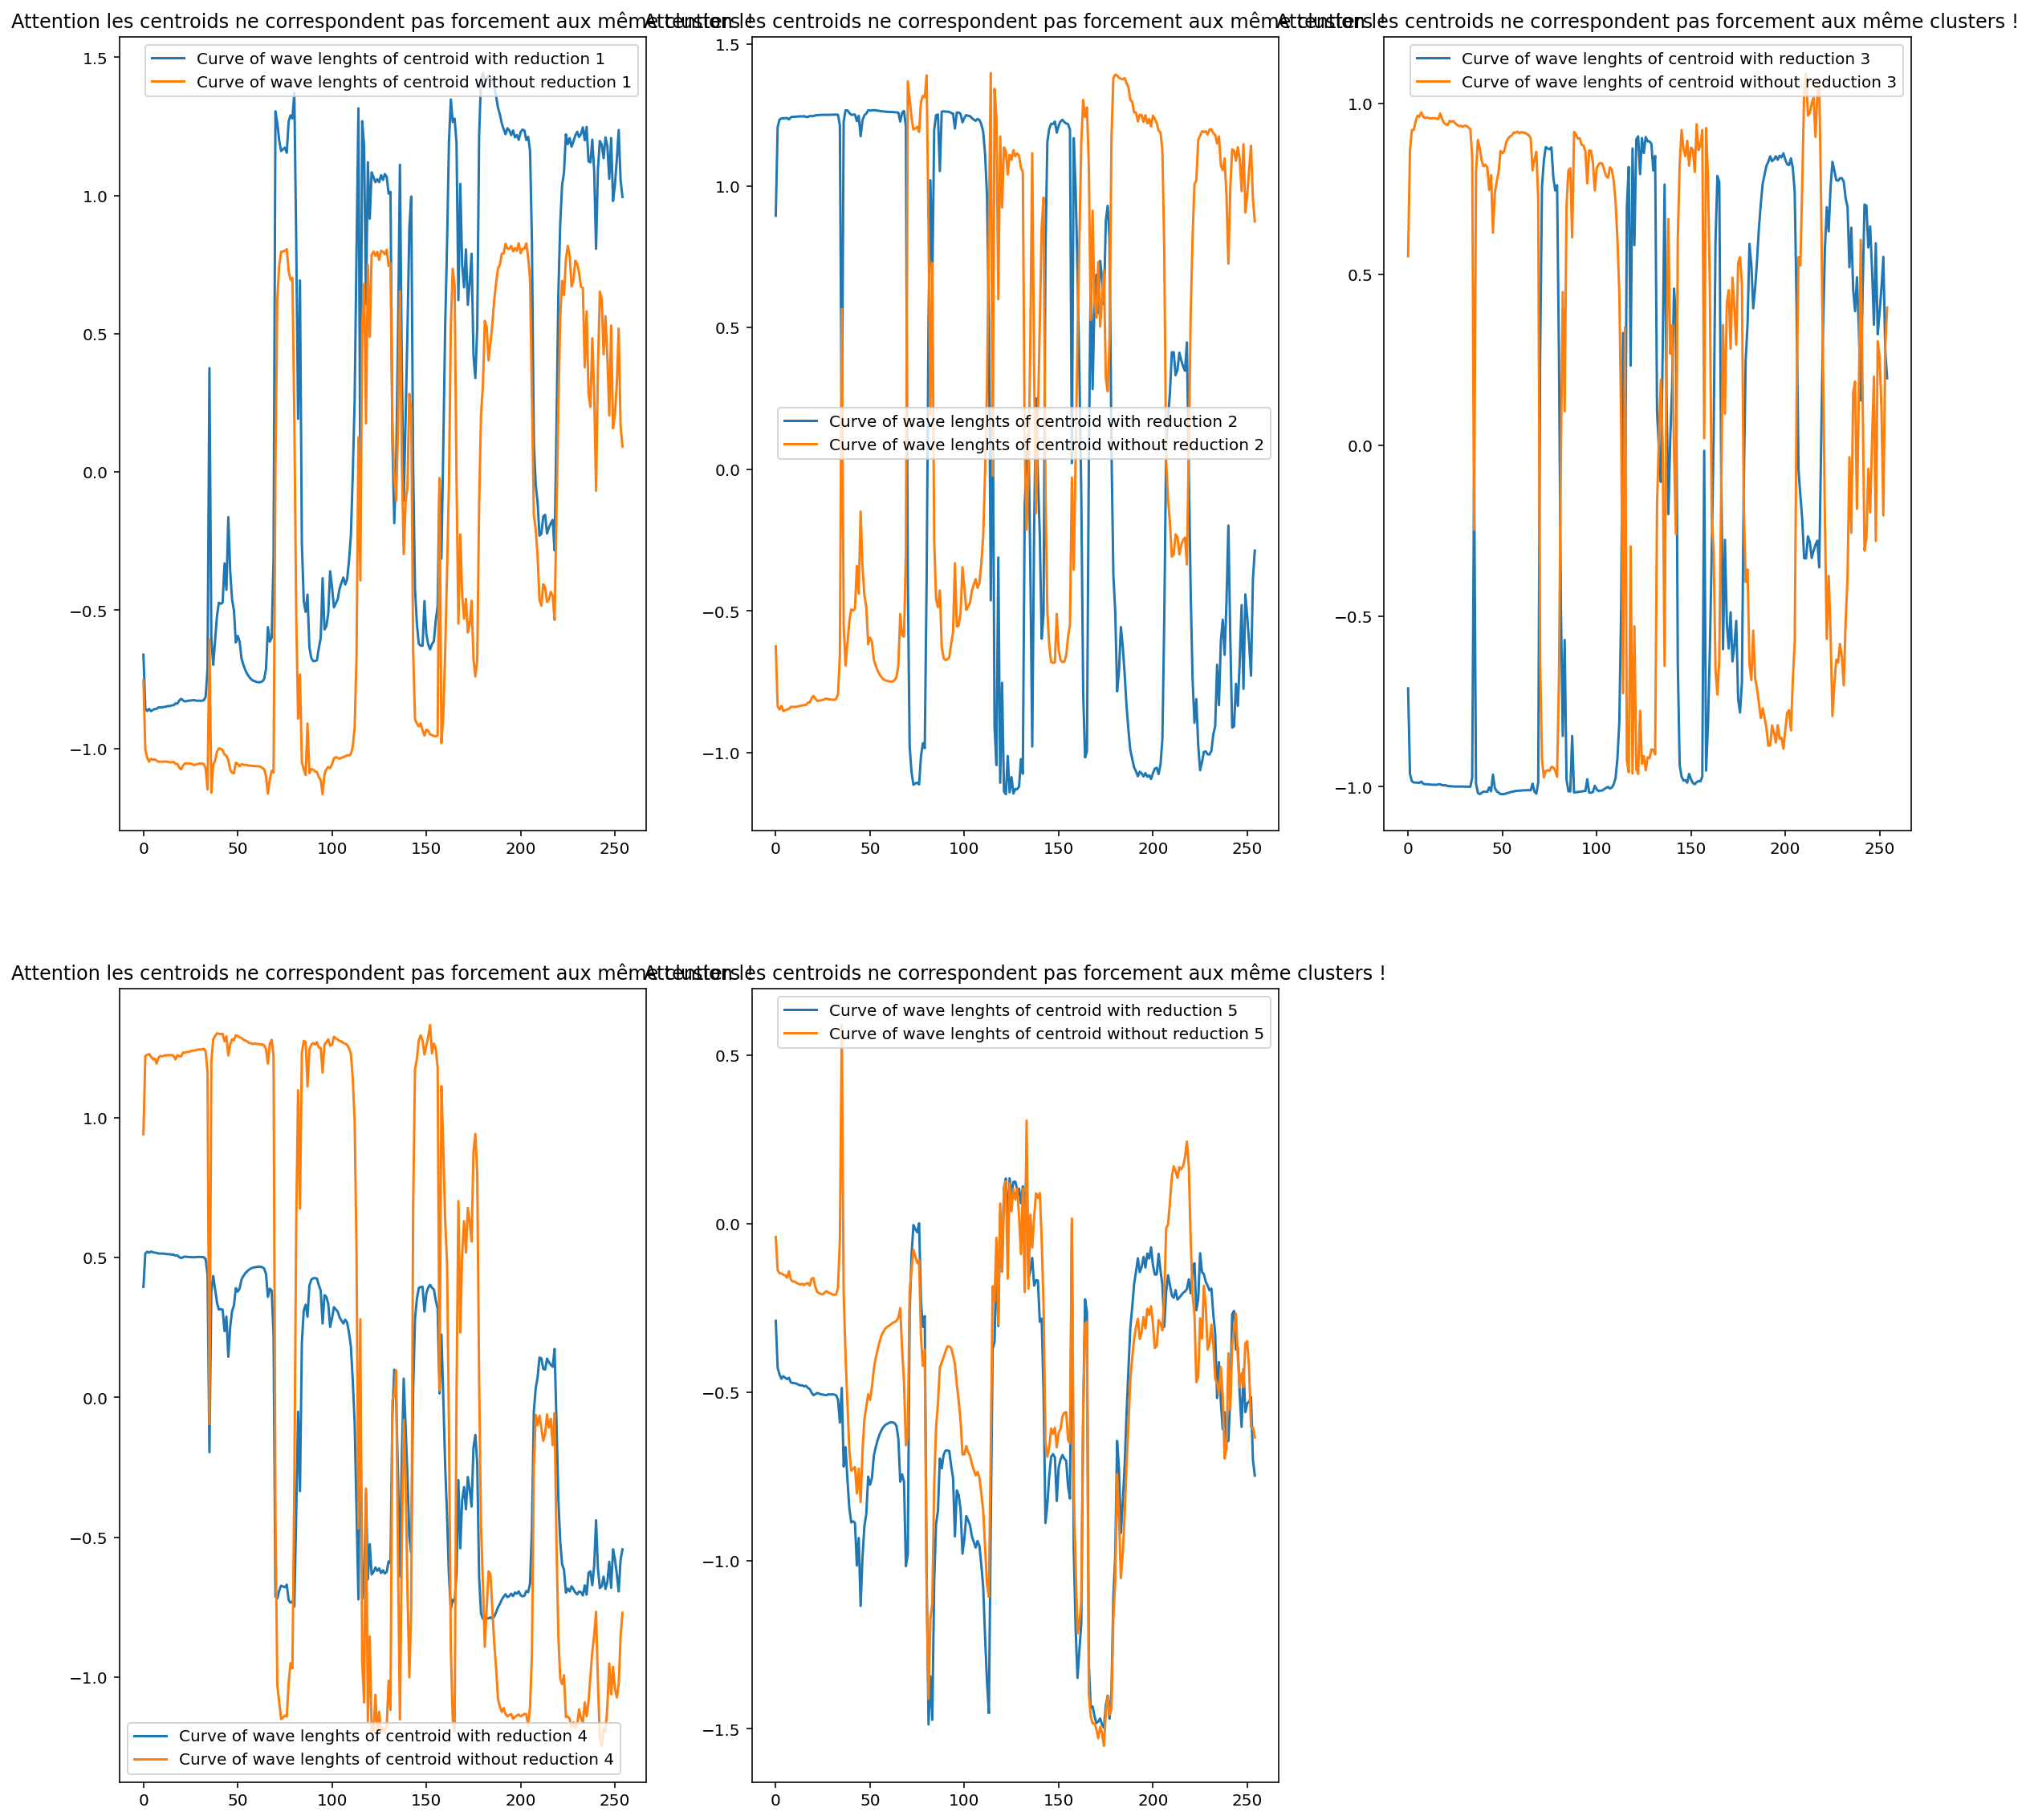

In [28]:
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.plot(centroids_255[i],
             label=f"Curve of wave lenghts of centroid with reduction {i+1}")
    plt.plot(centroids_full[i],
             label=f"Curve of wave lenghts of centroid without reduction {i+1}")
    plt.title("Attention les centroids ne correspondent pas forcement aux même clusters !")
    plt.legend()
plt.show()


## 4.2 Agglomerative Clustering

### 4.2.1. What is a good number of clusters for Agglomerative Clustering? We can use only the PCA reduced data and consider only a random subset of the data to decrease computation time

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [30]:
random_idx = np.random.randint(0, 38400, size=384)

normalized_mars_2d_subset = normalized_mars_2d[random_idx, :]


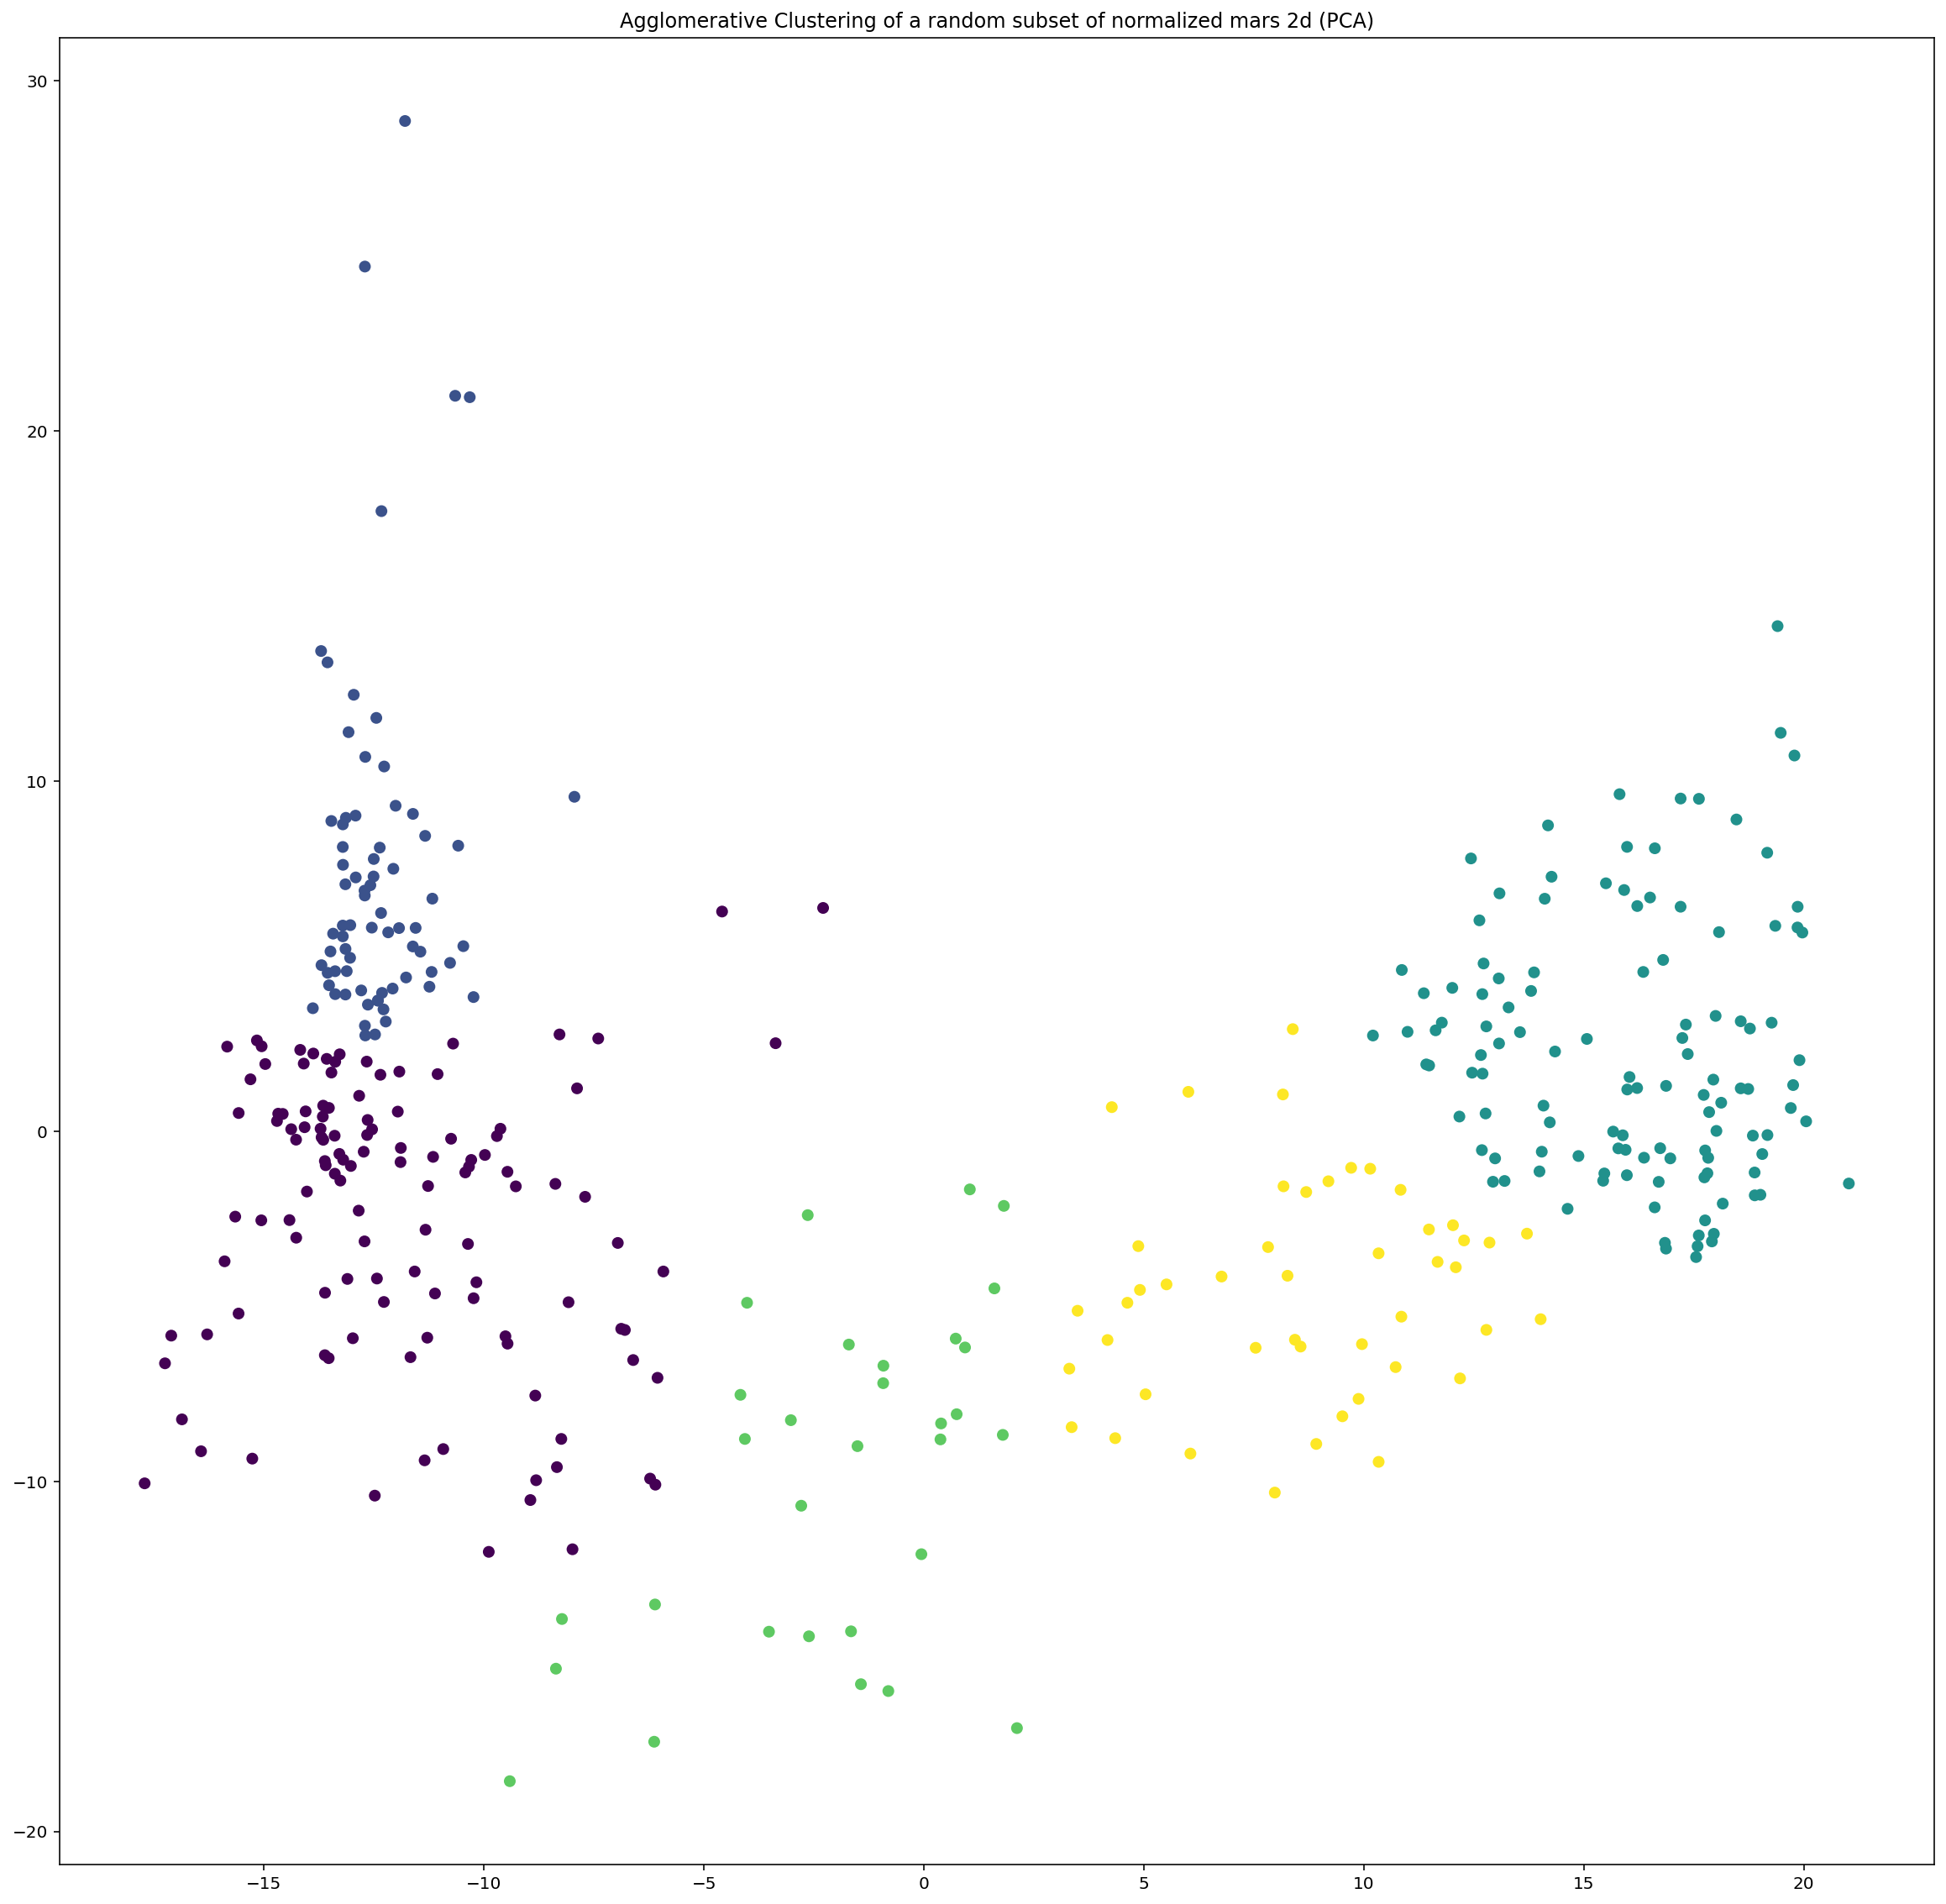

In [31]:
n_clusters = 5

ac = AgglomerativeClustering(n_clusters=n_clusters, compute_distances=True)
clusters = ac.fit_predict(normalized_mars_2d_subset)

plt.scatter(normalized_mars_2d_subset[:, 0],
            normalized_mars_2d_subset[:, 1], c=clusters)
plt.title("Agglomerative Clustering of a random subset of normalized mars 2d (PCA)")
plt.show()


In [32]:
children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.c_[children, distances, n_observations]

In [33]:
# dendrogram(linkage_matrix, labels=ac.labels_)
# plt.show()

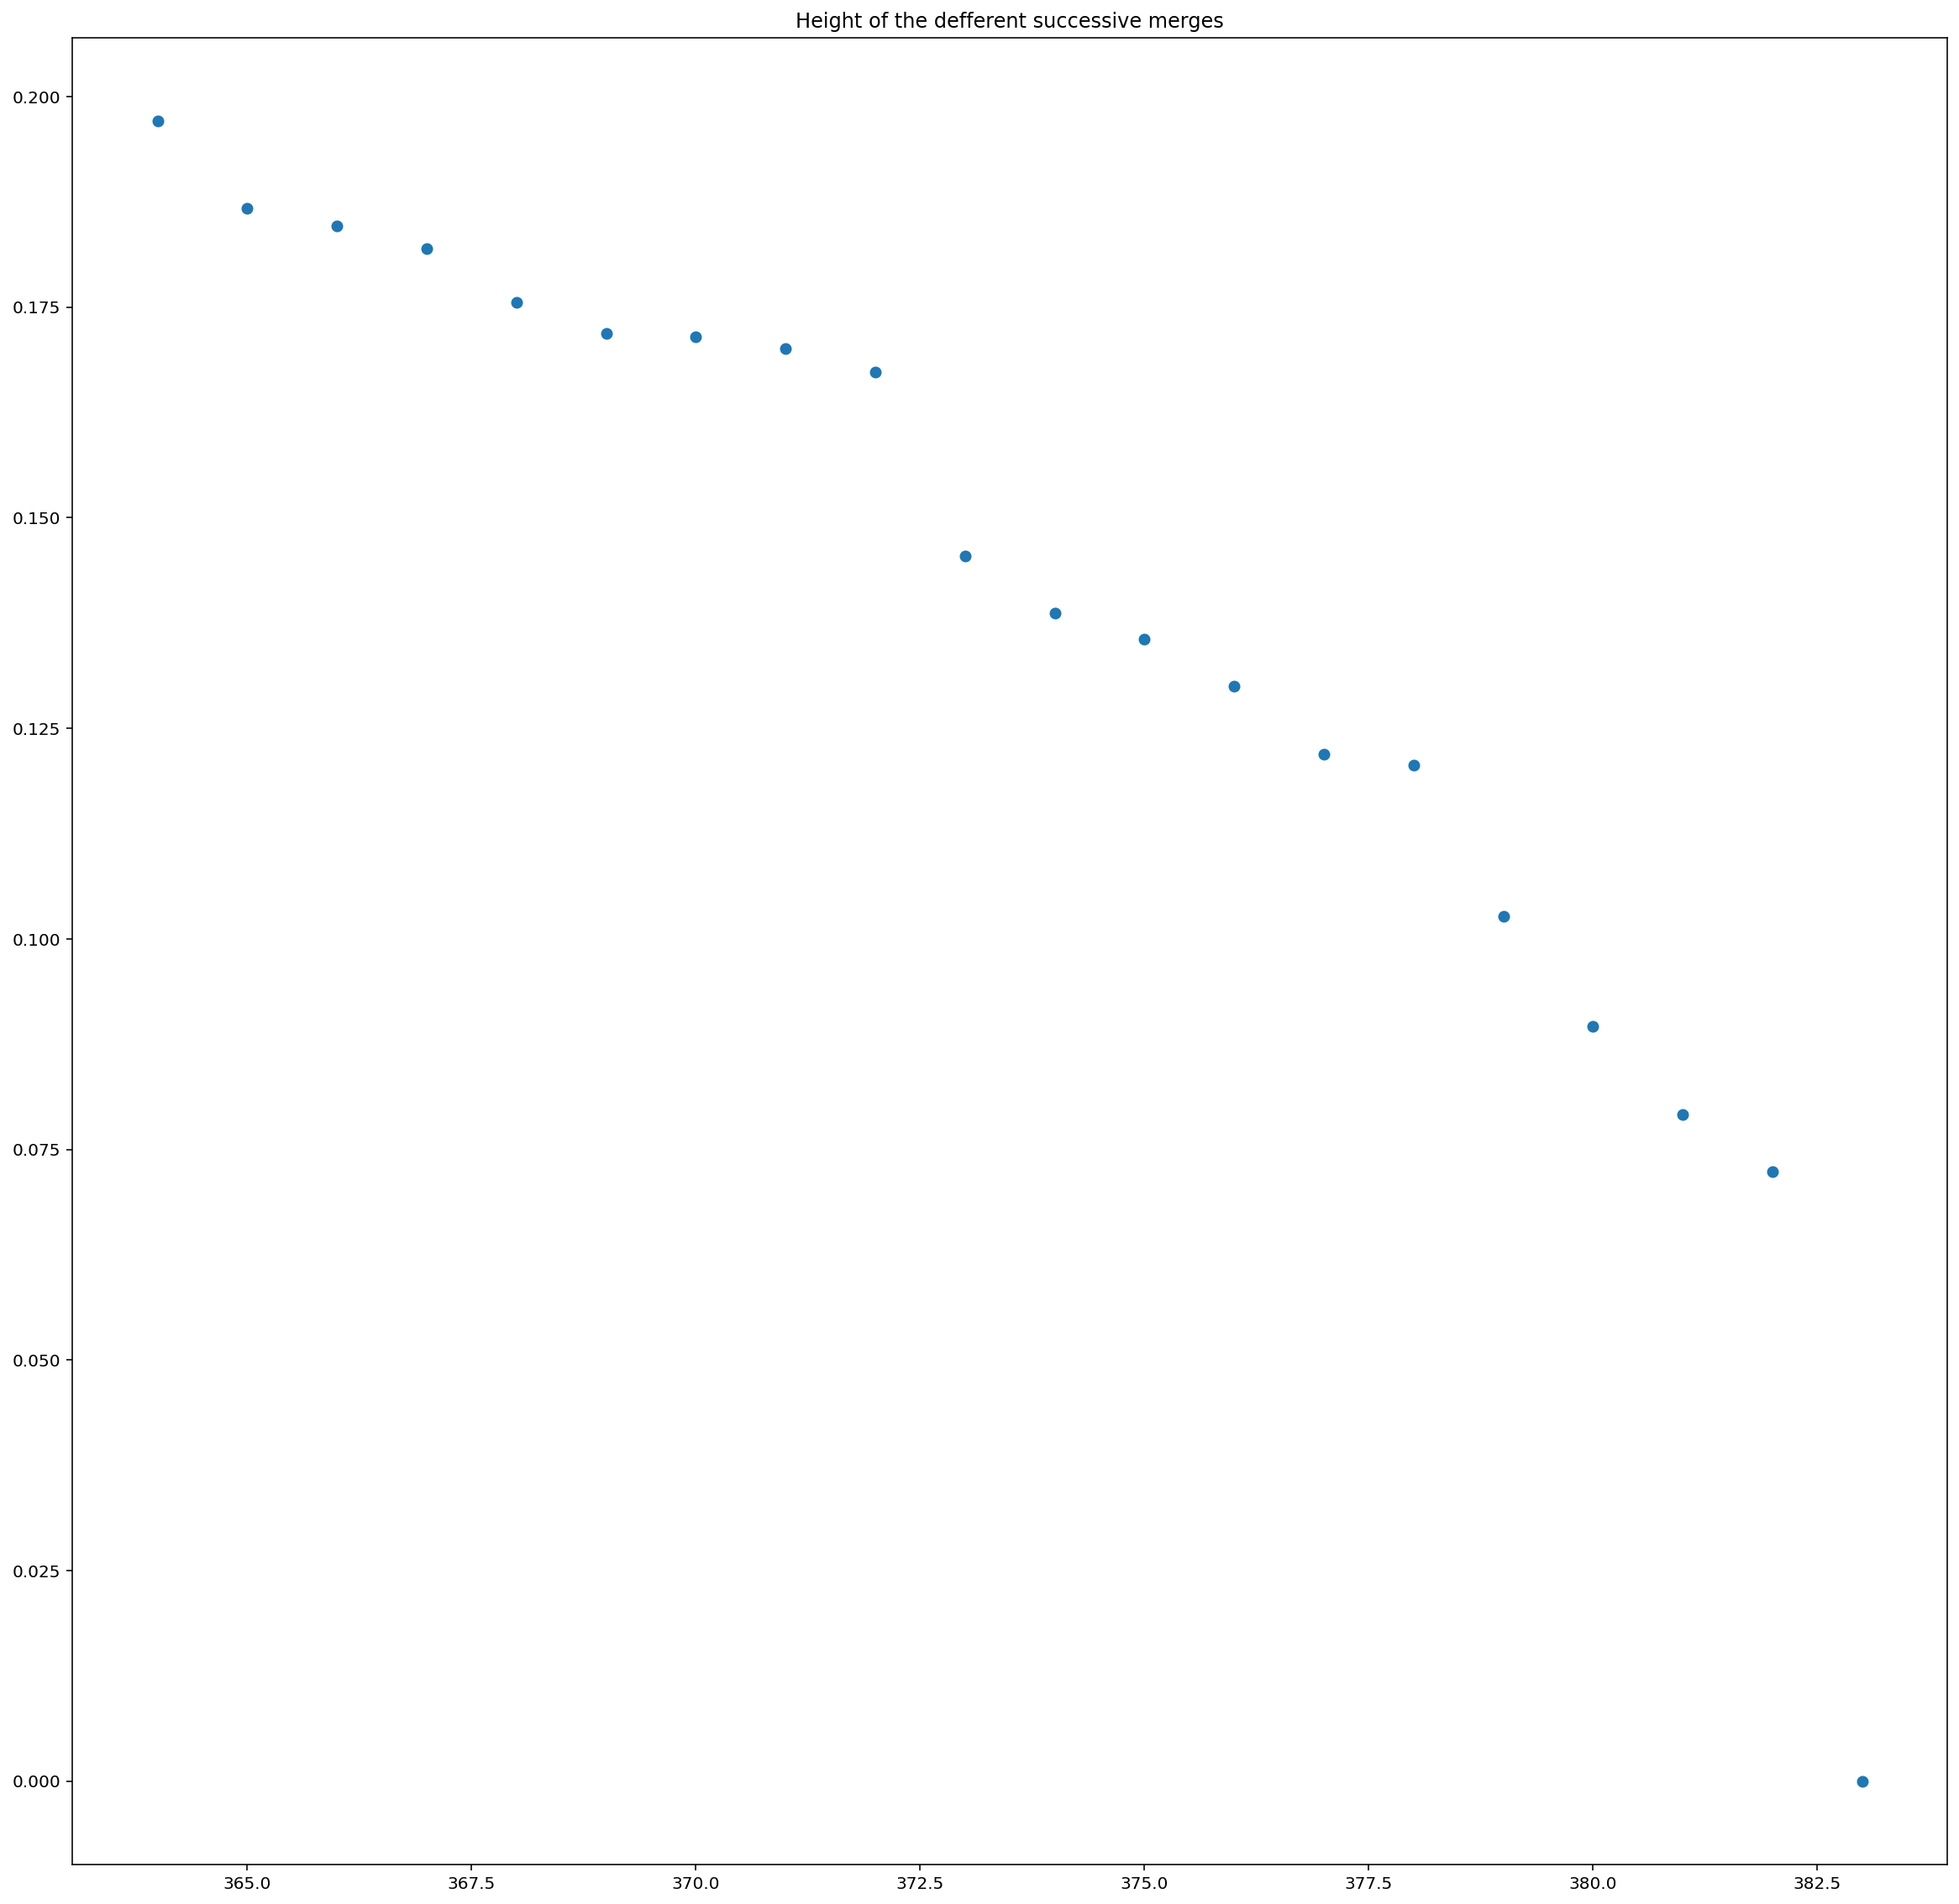

In [34]:
x = np.arange(len(normalized_mars_2d_subset)-1, 0, -1)
y = ac.distances_

plt.scatter(x[:20], y[:20])
#plt.plot(np.arange(0, 20), [5]*(20), 'r')
plt.title("Height of the defferent successive merges")
plt.show()



On voit qu'il a un saut pour $K=5$, $K=9$ ... Donc selon la précision que l'on veut on peut par exemple prendre $K=5$ pour pouvoir ainsi comparer avec les *k-means*

### 4.2.2. Apply Agglomerative Clustering on the MARS dataset, visualize the results.

In [35]:
# n_clusters = 5

# ac = AgglomerativeClustering(n_clusters=n_clusters, compute_distances=True)
# clusters = ac.fit_predict(normalized_mars_2d)

# plt.scatter(normalized_mars_2d[:, 0],
#             normalized_mars_2d[:, 1], c=clusters)
# plt.title("Agglomerative Clustering of normalized mars 2d (PCA)")
# plt.show()

# 5 Comparison of clustering algorithms

## 5.1. Using external validation metrics, evaluate which clustering algorithms, parameters, data preprocess- ing, etc. gives the best clustering results. In particular, we can study the influence of using PCA, the number of classes, the linkage methods, etc.

In [81]:
mask = pd.read_csv("./Data/mask.csv")
mask_vector = mask.to_numpy().flatten()



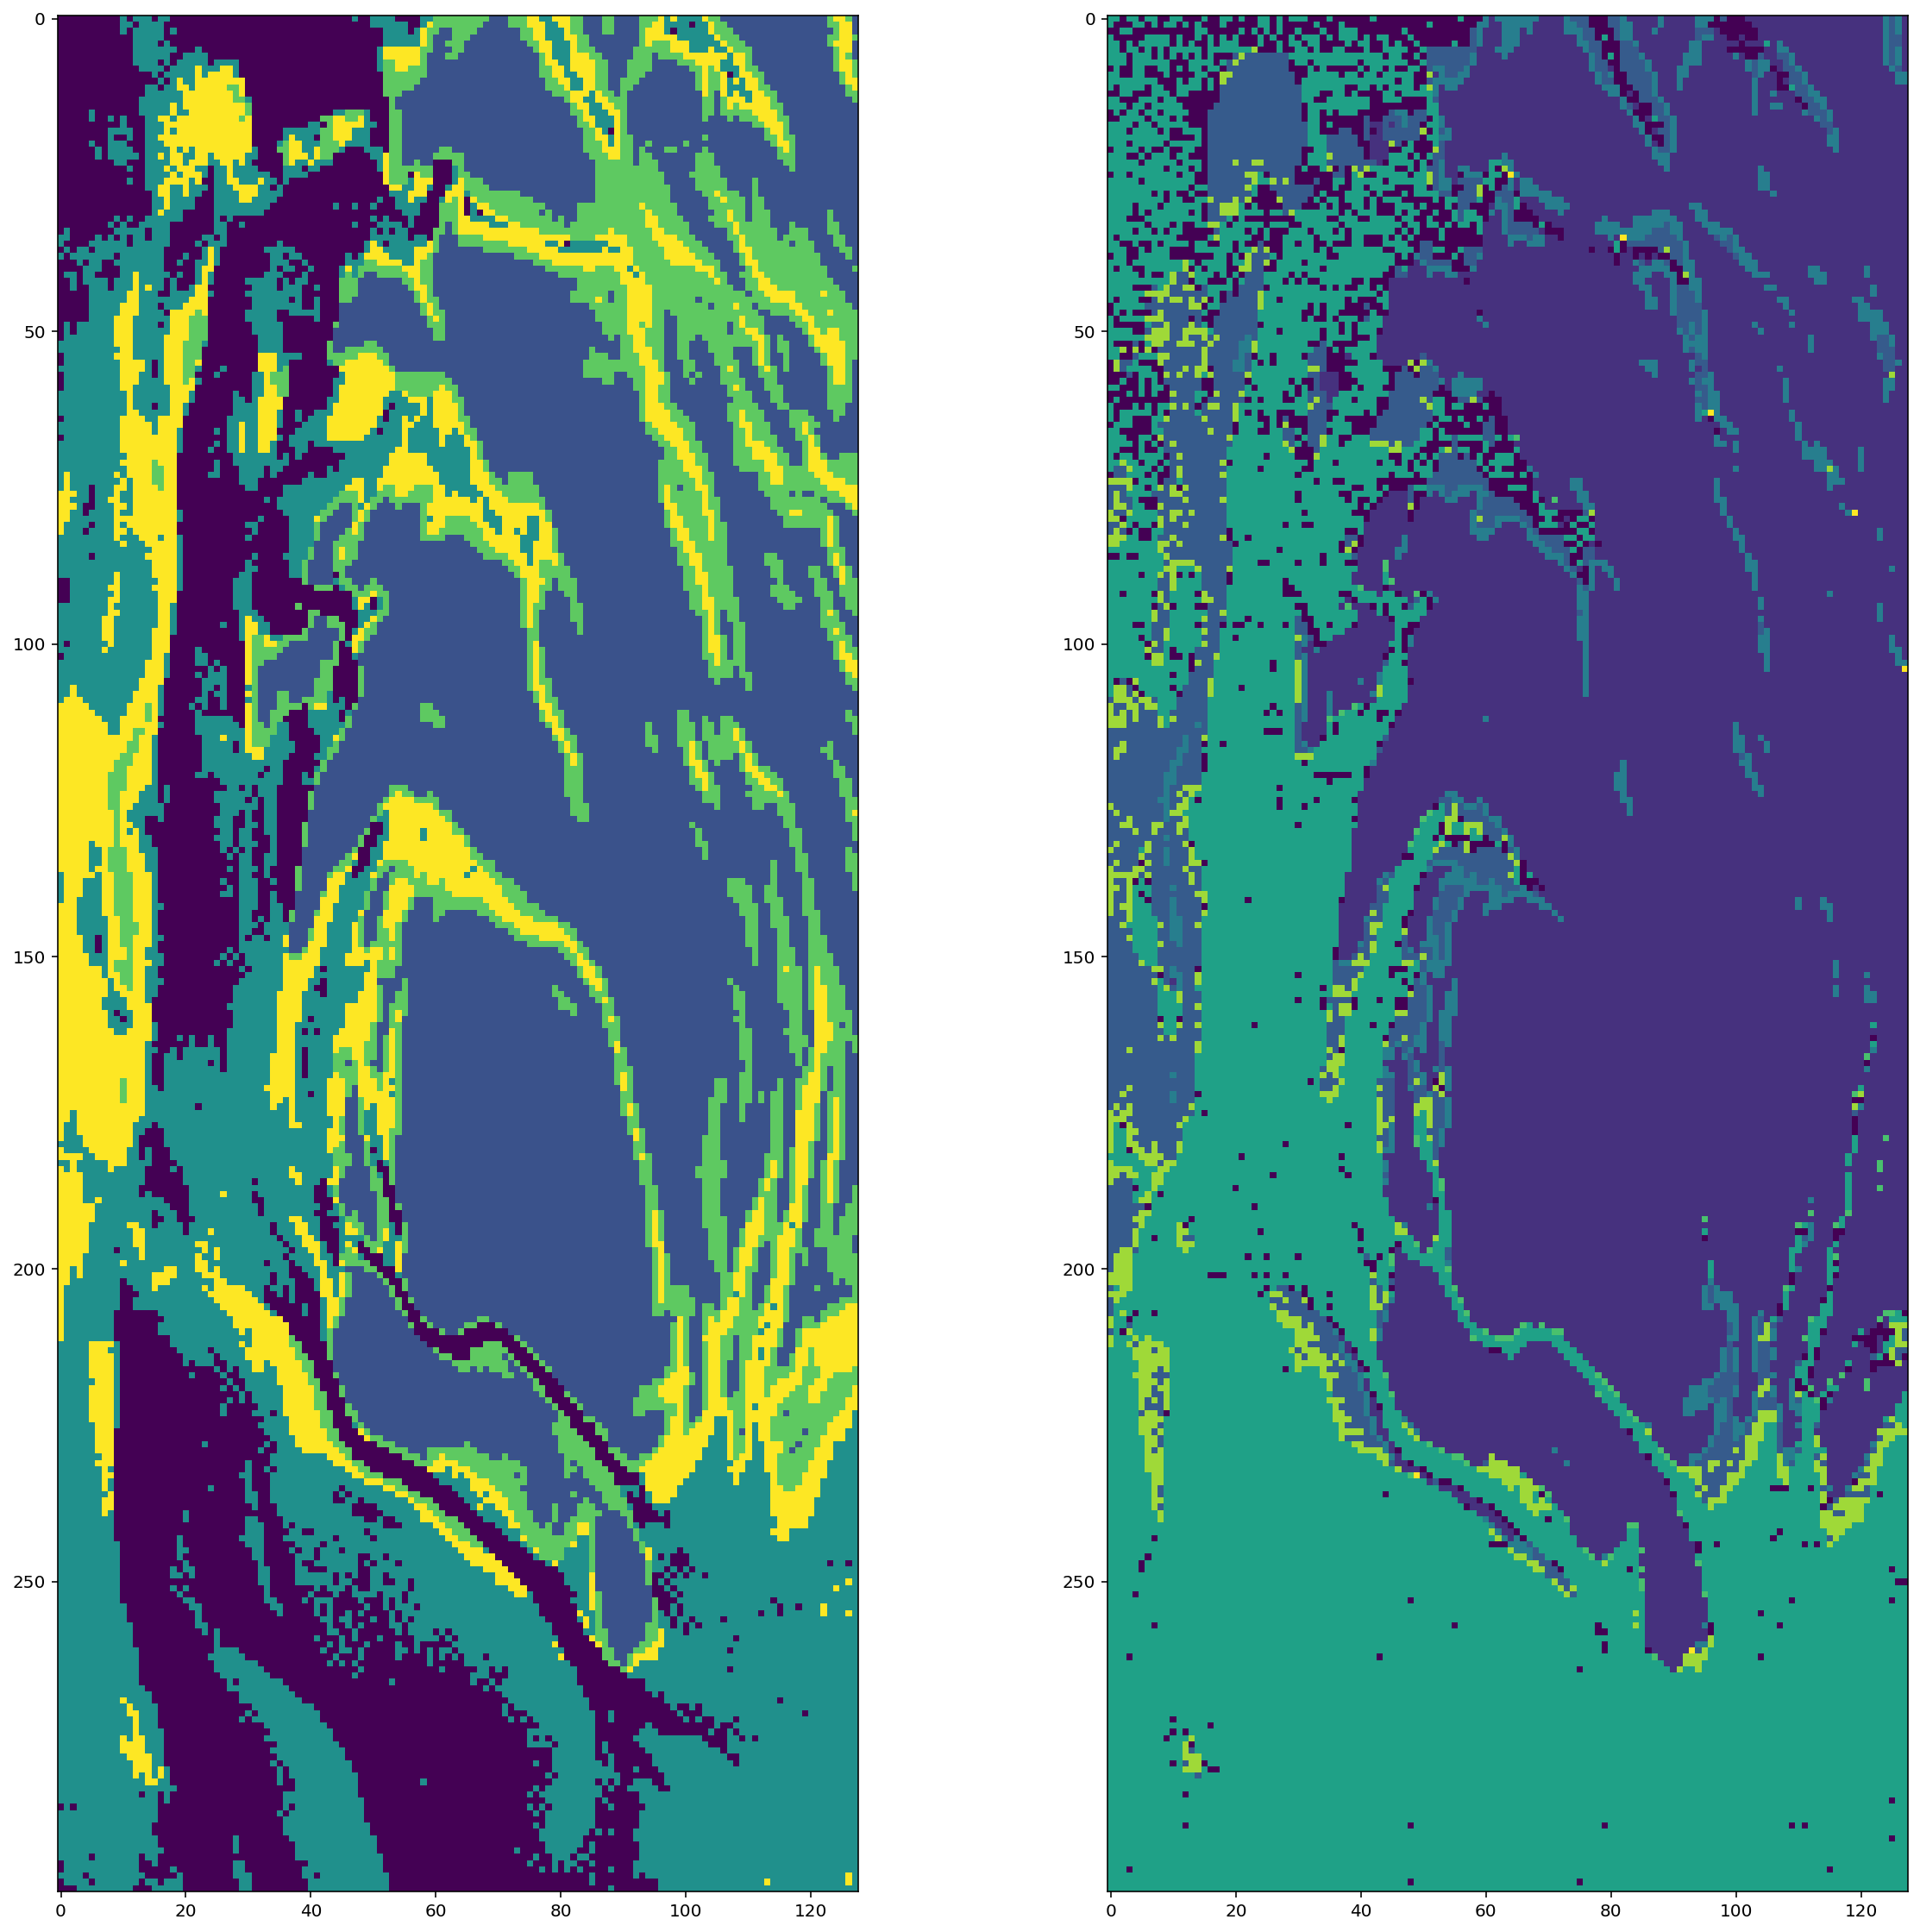

In [72]:
#clusters_image = clusters.reshape((300, 128))
plt.subplot(1, 2, 1)
plt.imshow(clusters_image)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

In [37]:
# def pca_reduction(data: np.ndarray, features_dim: int):
#     pca = PCA(n_components=features_dim)
#     pca.fit(data)
#     reduce_data = pca.transform(data)

In [ ]:
# # Calibration des classes
# def calibration(label_true, label_predict):
#     idx0_gp = np.where(mask == 0)
#     idx1_gp = np.where(mask == 1)
#     idx2_gp = np.where(mask == 2)
#     idx3_gp = np.where(mask == 3)
#     idx4_gp = np.where(mask == 4)

#     label_predict_calibrate = None
# Ou avec confusion matrix a permuté de façon diagonale

4 k-means, 2D PCA, Mallows Score = 0.7311618012237885
4 k-means, No PCA, Mallows Score = 0.7354997429607657
5 k-means, 2D PCA, Mallows Score = 0.6695508606046061
5 k-means, No PCA, Mallows Score = 0.6058203494458227
6 k-means, 2D PCA, Mallows Score = 0.5732660064485379
6 k-means, No PCA, Mallows Score = 0.587608903905229


<function matplotlib.pyplot.show(close=None, block=None)>

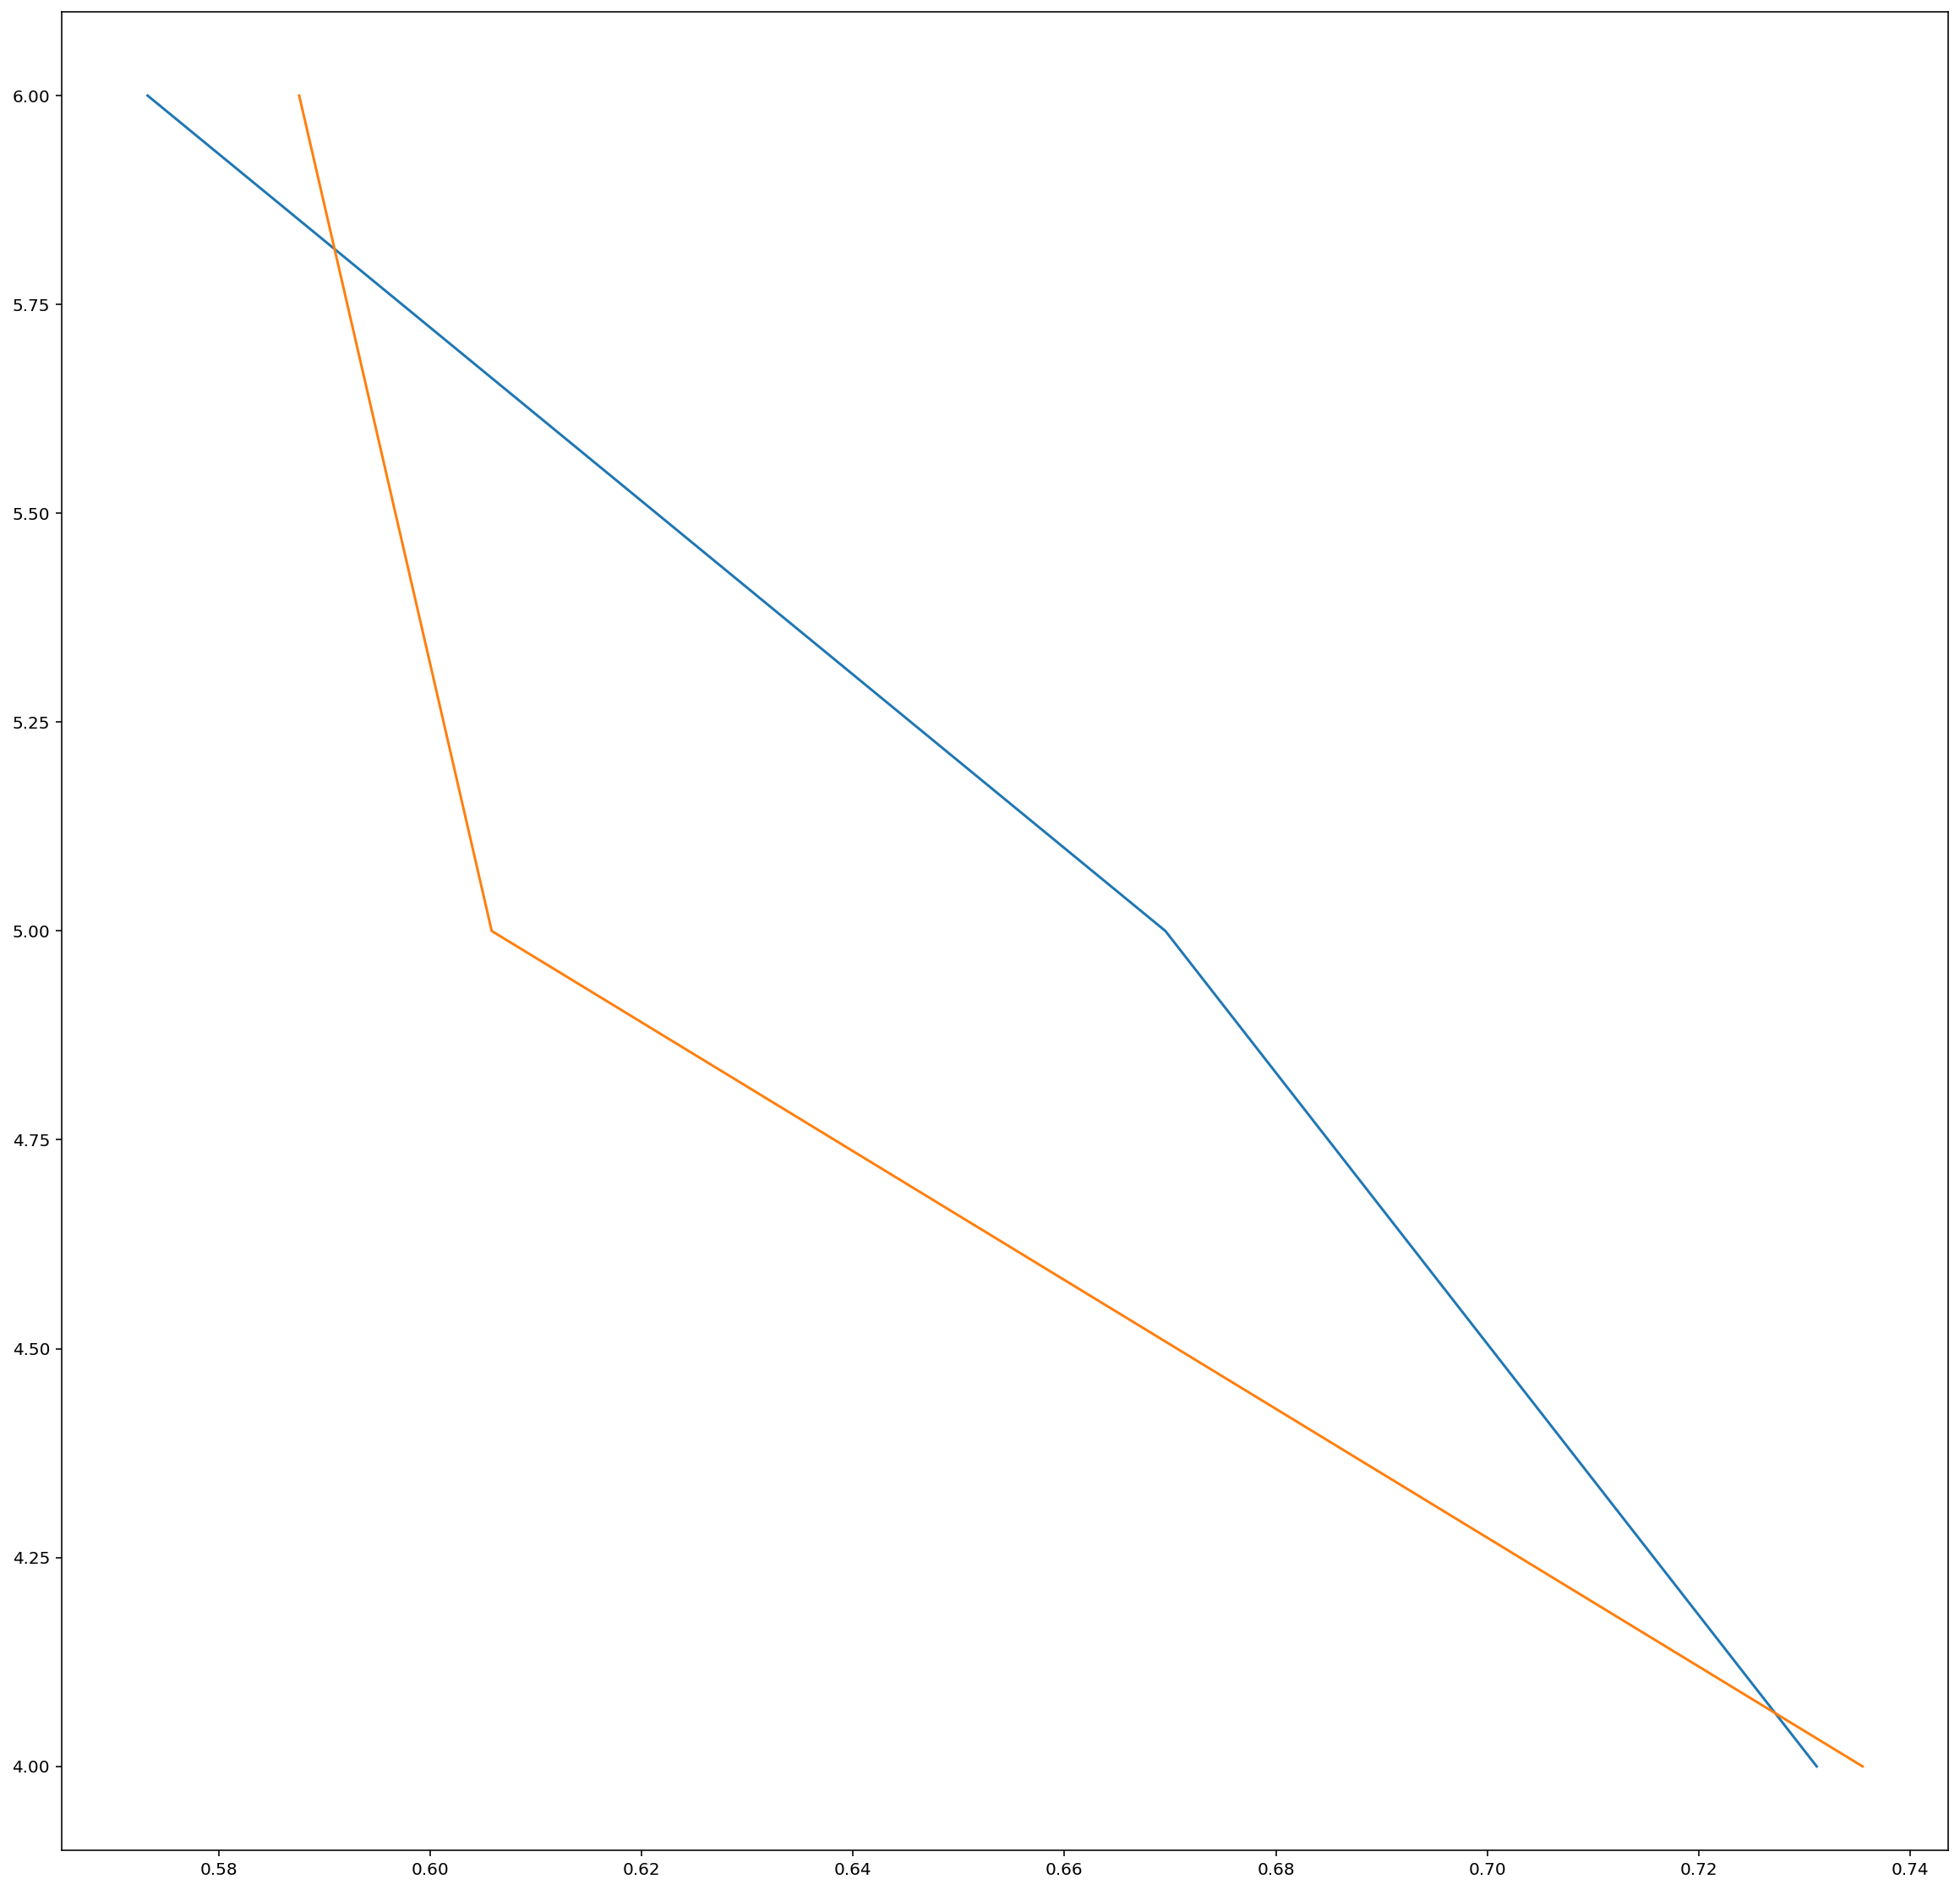

In [96]:
score2dkmeans = []
scorefullkmeans = []
score2dagglo = []
scorefullagglo = []
Krange = [4, 6, 6]

for K in Krange:
    # kmeans on reduced data (2d pcq)
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(normalized_mars_2d)
    predict_clusters = kmeans.predict(normalized_mars_2d)
    score = sklearn.metrics.fowlkes_mallows_score(
        predict_clusters, mask_vector)
    score2dkmeans.append(score)
    print(f"{K} k-means, 2D PCA, Mallows Score = {score}")

    # kmeans on full data
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(normalized_mars)
    predict_clusters = kmeans.predict(normalized_mars)
    score = sklearn.metrics.fowlkes_mallows_score(
        predict_clusters, mask_vector)
    scorefullkmeans.append(score)
    print(f"{K} k-means, No PCA, Mallows Score = {score}")

    # Agglomerative on reduced data (2d pcq)
    ac = AgglomerativeClustering(n_clusters=K, compute_distances=False)
    predict_clusters = ac.fit_predict(normalized_mars_2d)
    score = sklearn.metrics.fowlkes_mallows_score(
        predict_clusters, mask_vector)
    score2dagglo.append(score)
    print(f"{K} Agglo, 2D PCA, Mallows Score = {score}")

    # Agglomerative on full data
    ac = AgglomerativeClustering(n_clusters=K, compute_distances=False)
    predict_clusters = ac.fit_predict(normalized_mars)
    score = sklearn.metrics.fowlkes_mallows_score(
        predict_clusters, mask_vector)
    scorefullagglo.append(score)
    print(f"{K} Agglo, 2D PCA, Mallows Score = {score}")


plt.plot(score2dkmeans, Krange, label="2D PCA k-means")
plt.plot(scorefullkmeans, Krange, label="No PCA k-means")
plt.show


Yes it's seems that 

In [38]:
normalized_mars.shape

(38400, 255)

In [39]:
normalized_mars_2d.shape

(38400, 2)